<h1 align = center><u>AI Melano Infosys Internship Oct2024</u></h1>

<h2 align = center>1. Data Loading and Initial Exploration</h2>

In [ ]:
# Import the necessary Libraries

import os  # This library helps us to read & write the data from OS.
import pandas as pd  # Pandas helps us to load the data efficiently.
import matplotlib.pyplot as plt  # To represent the Visualization.
import imagehash
from PIL import Image  # This used to load the image for analyses.
import random  # The random library is using to pick the images randomly to visualize it.
from collections import Counter  # Used for counting occurrences of elements in a collection, like class distributions
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels as numeric values
import shutil  # For file operations such as copying or moving files
import seaborn as sns  # Data visualization library, often used for heatmaps and plots
from tqdm import tqdm  # Import tqdm for progress representation
import hashlib #Create a Hash Library to store the index for the Values
from torchvision import transforms  # Import data augmentation and preprocessing transforms from the PyTorch library
import mplcursors  # Import mplcursors to add interactive cursor annotations to matplotlib plots
from tabulate import tabulate  # Import tabulate for easy display of tables in the console
from collections import defaultdict  # Import defaultdict, a dictionary subclass that provides default values for nonexistent keys
import matplotlib.image as mpimg  # Import matplotlib's image module to read and display images
import imgaug.augmenters as iaa  # Import imgaug's augmentation functions to apply transformations to images
import cv2  # Import OpenCV for image processing and computer vision functions
from rich.console import Console  # Import Console from rich to print styled output in the terminal
from rich.table import Table  # Import Table from rich to display tables with enhanced formatting
from rich.style import Style  # Import Style to apply custom text styling in the console
import rich.box  # Import box styles from rich for custom table borders
from imgaug import augmenters as iaa
from albumentations import Compose, Rotate, HorizontalFlip, RandomBrightnessContrast, ShiftScaleRotate
from albumentations import Crop
import matplotlib.image as mpimg
from google.colab import files
import numpy as np
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import mixed_precision
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG19
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


<h3><i>Load the main dierctory</i></h3>

In [ ]:
# Upload the dataset to Colab
dataset_directory = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset'

# List all uploaded files
files = os.listdir(dataset_directory)

# Print the files
print(files)

['test', 'train']


#### Insights:
- The output reveals that the main directory contains two primary folders: **train** and **test.**

<h3><i>Count the Images and format</i></h3>

In [ ]:
# Define the path to your dataset folder (adjust for Google Colab)
folder_path = '/content/melanoma_cancer_dataset'  # Path where your dataset is located

# Initialize a counter for file types
file_types = Counter()

# Walk through the directory to count file types
for dirpath, dirnames, filenames in os.walk(folder_path):
    for file in filenames:
        # Get the file extension
        _, ext = os.path.splitext(file)
        # Update the counter
        file_types[ext] += 1

# Print the results
print("File types and their counts:")
for ext, count in file_types.items():
    print(f"{ext}: {count}")

File types and their counts:
.jpg: 10605


#### Insights:
- The main folder contains a total of **10,605 images in JPG format.**

<h3><i>Load the images from Train and Test directory</i></h3>

In [ ]:
# Define the path to the training and testing datasets, considering the nested folder structure
train_data = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train'  # Update with correct path
test_data = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test'    # Update with correct path

# Load classes from the training dataset
classes_train = os.listdir(train_data)  # Get all class folders from the training dataset
class_count_train = {}
for cls in classes_train:
    class_folder = os.path.join(train_data, cls)  # Path to each class folder
    if os.path.isdir(class_folder):  # Ensure it's a directory
        class_count_train[cls] = len(os.listdir(class_folder))  # Count the number of files in the class folder

# Load classes from the test dataset
classes_test = os.listdir(test_data)  # Get all class folders from the testing dataset
class_count_test = {}
for cls in classes_test:
    class_folder = os.path.join(test_data, cls)  # Path to each class folder
    if os.path.isdir(class_folder):  # Ensure it's a directory
        class_count_test[cls] = len(os.listdir(class_folder))  # Count the number of files in the class folder

# Print the results
print("Class counts in the Training Dataset:")
for cls, count in class_count_train.items():
    print(f"{cls}: {count}")

print("\nClass counts in the Testing Dataset:")
for cls, count in class_count_test.items():
    print(f"{cls}: {count}")

Class counts in the Training Dataset:
malignant: 4605
benign: 5000

Class counts in the Testing Dataset:
malignant: 500
benign: 500


#### Insights:
- Training Data: 5000 benign and 4605 malignant images.
- Testing Data: 500 benign and 500 malignant images.
- Total Images: 10,605 (5500 benign, 5105 malignant).

<h2 align = center>2. Data Visualization and Image Dimension Analysis</h2>

<h3><i>Plot Dimensions configuration</i></h3>

In [ ]:
plt.figure(figsize = (4, 2))

<Figure size 400x200 with 0 Axes>

<Figure size 400x200 with 0 Axes>

<h3><i>Plotting the Graph</i></h3>

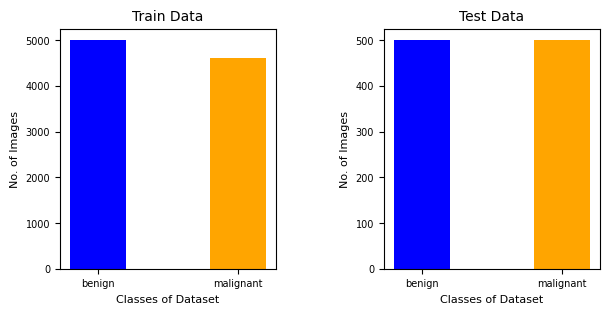

In [ ]:
# Set up a smaller figure size
plt.figure(figsize=(6, 3))  # Adjust width and height as needed

# Plot class distribution for training data
plt.subplot(1, 2, 1)
plt.bar(class_count_train.keys(), class_count_train.values(), color=['blue', 'orange'], width=0.4)
plt.title('Train Data', fontsize=10)
plt.xlabel('Classes of Dataset', fontsize=8)
plt.ylabel('No. of Images', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Plot class distribution for test data
plt.subplot(1, 2, 2)
plt.bar(class_count_test.keys(), class_count_test.values(), color=['blue', 'orange'], width=0.4)
plt.title('Test Data', fontsize=10)
plt.xlabel('Classes of Dataset', fontsize=8)
plt.ylabel('No. of Images', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Adjust layout to avoid overlap and ensure everything fits well
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.5)

# Show the plots
plt.show()

#### Insights:
- The output displays bar charts comparing the class distributions of the training and testing datasets. The left chart shows that the training dataset has **slightly more benign images than malignant ones**, suggesting a mild class imbalance. The right chart **reveals a balanced distribution between benign and malignant images in the test dataset**. This visualization highlights the class proportions in both datasets, ensuring the **testing set is well-balanced for model evaluation**, while the training set has a slight imbalance.

<h3><i>Function for finding Dimension of Images</i></h3>

In [ ]:
# Lists to store image dimensions
image_dimensions_train = []
image_dimensions_test = []

# Loop through each class folder in the train data and get the dimensions of each image
for cls in classes_train:
    class_folder = os.path.join(train_data, cls)
    images = os.listdir(class_folder)
    for img_name in images:
        img_path = os.path.join(class_folder, img_name)
        try:
            img = Image.open(img_path)  # Open the image
            image_dimensions_train.append(img.size)  # Save dimensions (width, height)
            img.close()  # Close the image to free memory
        except Exception as e:
            print(f"Error processing image {img_name} in training data: {e}")

# Loop through each class folder in the test data and get the dimensions of each image
for cls in classes_test:
    class_folder = os.path.join(test_data, cls)
    images = os.listdir(class_folder)
    for img_name in images:
        img_path = os.path.join(class_folder, img_name)
        try:
            img = Image.open(img_path)  # Open the image
            image_dimensions_test.append(img.size)  # Save dimensions (width, height)
            img.close()  # Close the image to free memory
        except Exception as e:
            print(f"Error processing image {img_name} in test data: {e}")

# Output a sample of the collected image dimensions
print("Sample of image dimensions in training data:", image_dimensions_train[:5])
print("Sample of image dimensions in testing data:", image_dimensions_test[:5])

Sample of image dimensions in training data: [(300, 300), (300, 300), (300, 300), (300, 300), (300, 300)]
Sample of image dimensions in testing data: [(300, 300), (300, 300), (300, 300), (300, 300), (300, 300)]


<h3><i>Storing the Dimensions in array using NUMPY</i></h3>

In [ ]:
# Convert to numpy arrays for easy analysis
dimensions_array_train = np.array(image_dimensions_train)
if len(dimensions_array_train) > 0:  # Check if the array is not empty
    widths_train = dimensions_array_train[:, 0]  # Extract widths from training data
    heights_train = dimensions_array_train[:, 1]  # Extract heights from training data
else:
    print("No image dimensions found for training data.")

dimensions_array_test = np.array(image_dimensions_test)
if len(dimensions_array_test) > 0:  # Check if the array is not empty
    widths_test = dimensions_array_test[:, 0]  # Extract widths from test data
    heights_test = dimensions_array_test[:, 1]  # Extract heights from test data
else:
    print("No image dimensions found for test data.")

# Print sample outputs to verify
print("Sample widths from training data:", widths_train[:5] if 'widths_train' in locals() else "N/A")
print("Sample heights from training data:", heights_train[:5] if 'heights_train' in locals() else "N/A")
print("Sample widths from testing data:", widths_test[:5] if 'widths_test' in locals() else "N/A")
print("Sample heights from testing data:", heights_test[:5] if 'heights_test' in locals() else "N/A")

Sample widths from training data: [300 300 300 300 300]
Sample heights from training data: [300 300 300 300 300]
Sample widths from testing data: [300 300 300 300 300]
Sample heights from testing data: [300 300 300 300 300]


<h3><i>Print the Dimension of the Images</i></h3>

In [ ]:
# Print statistics about training image dimensions
print('TRAIN DATA:')
if len(widths_train) > 0 and len(heights_train) > 0:
    print(f'Min Width: {widths_train.min()}, Max Width: {widths_train.max()}, Mean Width: {widths_train.mean()}')
    print(f'Min Height: {heights_train.min()}, Max Height: {heights_train.max()}, Mean Height: {heights_train.mean()}')
else:
    print("No data available for training dimensions.")

# Print statistics about test image dimensions
print('\nTEST DATA:')
if len(widths_test) > 0 and len(heights_test) > 0:
    print(f'Min Width: {widths_test.min()}, Max Width: {widths_test.max()}, Mean Width: {widths_test.mean()}')
    print(f'Min Height: {heights_test.min()}, Max Height: {heights_test.max()}, Mean Height: {heights_test.mean()}')
else:
    print("No data available for test dimensions.")


TRAIN DATA:
Min Width: 300, Max Width: 300, Mean Width: 300.0
Min Height: 300, Max Height: 300, Mean Height: 300.0

TEST DATA:
Min Width: 300, Max Width: 300, Mean Width: 300.0
Min Height: 300, Max Height: 300, Mean Height: 300.0


#### Insights:
- The image dimensions for **both the training and test datasets are consistent**, with all images having a **width and height of 300 pixels**. The **minimum, maximum, and mean values for both width and height are all 300**, indicating that the images are of uniform size across both datasets.

<h3><i>Function to Analyze Image Size Distribution</i></h3>

In [ ]:
def analyze_image_size_distribution(data_dir):
    # Lists to store image dimensions
    widths = []
    heights = []

    # Loop through each label (subfolder) in the given directory
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)

        # Check if the label is a directory (class folder)
        if os.path.isdir(label_dir):
            print(f"Processing folder: {label_dir}")  # Print the current folder
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)

                # Check if the file is an image (by extension or other criteria)
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    try:
                        # Open image and get dimensions
                        with Image.open(image_path) as img:
                            widths.append(img.width)   # Add image width
                            heights.append(img.height) # Add image height
                    except (IOError, SyntaxError) as e:
                        print(f"Error opening image {image_path}: {str(e)}")

    # Return the width and height data
    return widths, heights

# Example usage:
train_data_dir = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train'  # Path to your train dataset
test_data_dir = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test'    # Path to your test dataset

# Analyze image sizes for train and test datasets
widths_train, heights_train = analyze_image_size_distribution(train_data_dir)
widths_test, heights_test = analyze_image_size_distribution(test_data_dir)

# Print a sample output
if widths_train and widths_test:
    print(f"Found {len(widths_train)} images in train set and {len(widths_test)} images in test set.")
    print(f"Train Set - Min Width: {min(widths_train)}, Max Width: {max(widths_train)}, Mean Width: {sum(widths_train)/len(widths_train)}")
    print(f"Train Set - Min Height: {min(heights_train)}, Max Height: {max(heights_train)}, Mean Height: {sum(heights_train)/len(heights_train)}")
    print(f"Test Set - Min Width: {min(widths_test)}, Max Width: {max(widths_test)}, Mean Width: {sum(widths_test)/len(widths_test)}")
    print(f"Test Set - Min Height: {min(heights_test)}, Max Height: {max(heights_test)}, Mean Height: {sum(heights_test)/len(heights_test)}")
else:
    print("No images found in one or both directories.")


Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/malignant
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/benign
Found 9605 images in train set and 1000 images in test set.
Train Set - Min Width: 300, Max Width: 300, Mean Width: 300.0
Train Set - Min Height: 300, Max Height: 300, Mean Height: 300.0
Test Set - Min Width: 300, Max Width: 300, Mean Width: 300.0
Test Set - Min Height: 300, Max Height: 300, Mean Height: 300.0


<h3><i>Function to categorize images</i></h3>

In [ ]:
def categorize_image_sizes(widths, heights):
    size_categories = {'Small': 0, 'Medium': 0, 'Large': 0}

    for width in widths:
        if width < 128:
            size_categories['Small'] += 1
        elif 128 <= width < 256:
            size_categories['Medium'] += 1
        else:
            size_categories['Large'] += 1

    return size_categories

<h3><i>Plot the size distribution</i></h3>

Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/malignant
Processing folder: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/benign


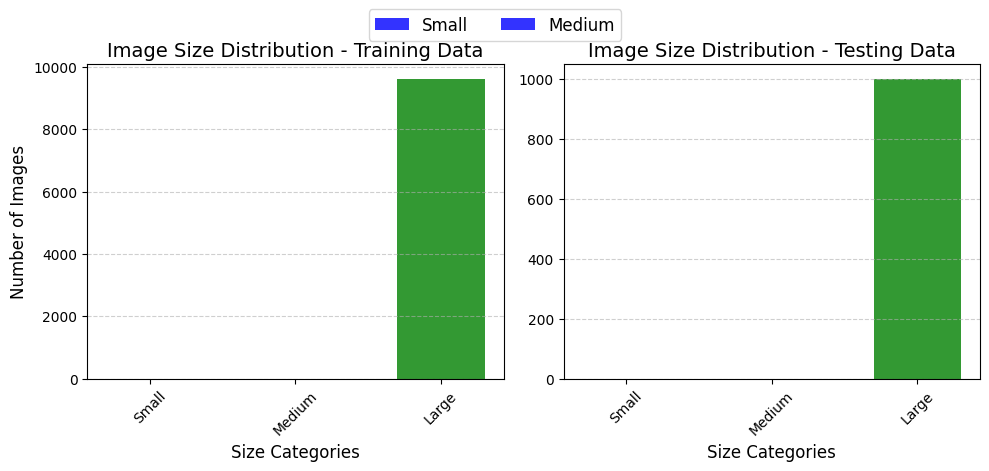

In [ ]:
def plot_image_size_distributions(train_sizes, test_sizes, train_title="Training Data", test_title="Testing Data"):
    # Extract labels and sizes for both distributions
    train_labels, train_counts = zip(*train_sizes.items())
    test_labels, test_counts = zip(*test_sizes.items())

    # Create a figure with two side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Define bar width and colors
    bar_width = 0.6
    colors = ['blue', 'orange', 'green']

    # Plot for training data
    axes[0].bar(train_labels, train_counts, width=bar_width, color=colors, alpha=0.8)
    axes[0].set_title(f"Image Size Distribution - {train_title}", fontsize=14)
    axes[0].set_xlabel("Size Categories", fontsize=12)
    axes[0].set_ylabel("Number of Images", fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    # Plot for testing data
    axes[1].bar(test_labels, test_counts, width=bar_width, color=colors, alpha=0.8)
    axes[1].set_title(f"Image Size Distribution - {test_title}", fontsize=14)
    axes[1].set_xlabel("Size Categories", fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    # Add a legend for both plots
    legend_labels = list(train_sizes.keys())  # Assuming categories are the same for train and test
    fig.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for the legend
    plt.show()

# Example usage:
# Analyze and plot for train and test directories
train_widths, train_heights = analyze_image_size_distribution(train_data)
test_widths, test_heights = analyze_image_size_distribution(test_data)

# Categorize image sizes
train_size_categories = categorize_image_sizes(train_widths, train_heights)
test_size_categories = categorize_image_sizes(test_widths, test_heights)

# Plot both distributions side by side
plot_image_size_distributions(train_size_categories, test_size_categories)

#### Insights:
- The graph plots the distribution of image sizes in the training and testing datasets across three categories: **Small, Medium, and Large**. However, all images are appearing as a large bar. The **x-axis represents the Size Categories** and **The y-axis defines the Number of Images**. Every **images falls under Large Category**

<h3><i>Aspect Ratios of Train and Test images</i></h3>

In [ ]:
# Calculate aspect ratios for the training images
aspect_ratios_train = [w / h for w, h in zip(widths_train, heights_train)]

# Calculate aspect ratios for the test images
aspect_ratios_test = [w / h for w, h in zip(widths_test, heights_test)]

<h3><i>Plot the ratio distribution</i></h3>

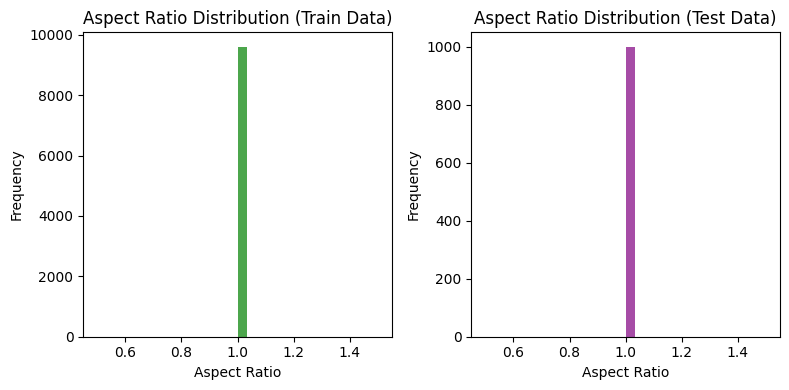

In [ ]:
# Plot aspect ratio distribution for training and test data
plt.figure(figsize=(8, 4))

# Training data plot
plt.subplot(1, 2, 1)
plt.hist(aspect_ratios_train, bins=30, color='green', alpha=0.7)
plt.title('Aspect Ratio Distribution (Train Data)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

# Test data plot
plt.subplot(1, 2, 2)
plt.hist(aspect_ratios_test, bins=30, color='purple', alpha=0.7)
plt.title('Aspect Ratio Distribution (Test Data)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.2)

# Show the plots
plt.tight_layout()
plt.show()

#### Insights:
- The aspect ratio distributions for **both the training and test data show that nearly all the images fall under an aspect ratio of 1**, indicating that most of the images are **relatively square or have a height greater than or equal to their width**. Both histograms have a peak concentrated around the lower aspect ratios, suggesting that the dataset primarily consists of **images with more equal or taller dimensions**, with little variation in aspect ratios.

<h2 align = center><i>3. Pixel Value Distribution for Training and Test Datasets</i></h2>

<h3><i>Computing Pixel Intensity Histograms for Training and Test Data</i></h3>

In [ ]:
# Function to compute histogram directly from images in a folder
def compute_pixel_histogram(data_path):
    pixel_histogram = np.zeros(256)  # For 256 pixel intensity values (0-255)

    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img_array = np.array(img).ravel()  # Flatten to 1D array
            # Update histogram for this image
            hist, _ = np.histogram(img_array, bins=256, range=(0, 256))
            pixel_histogram += hist  # Aggregate the histogram counts

    return pixel_histogram

# Get histograms for training and test data
train_pixel_histogram = compute_pixel_histogram(train_data)
test_pixel_histogram = compute_pixel_histogram(test_data)

<h3><i>Plot Distribution using histogram</i></h3>

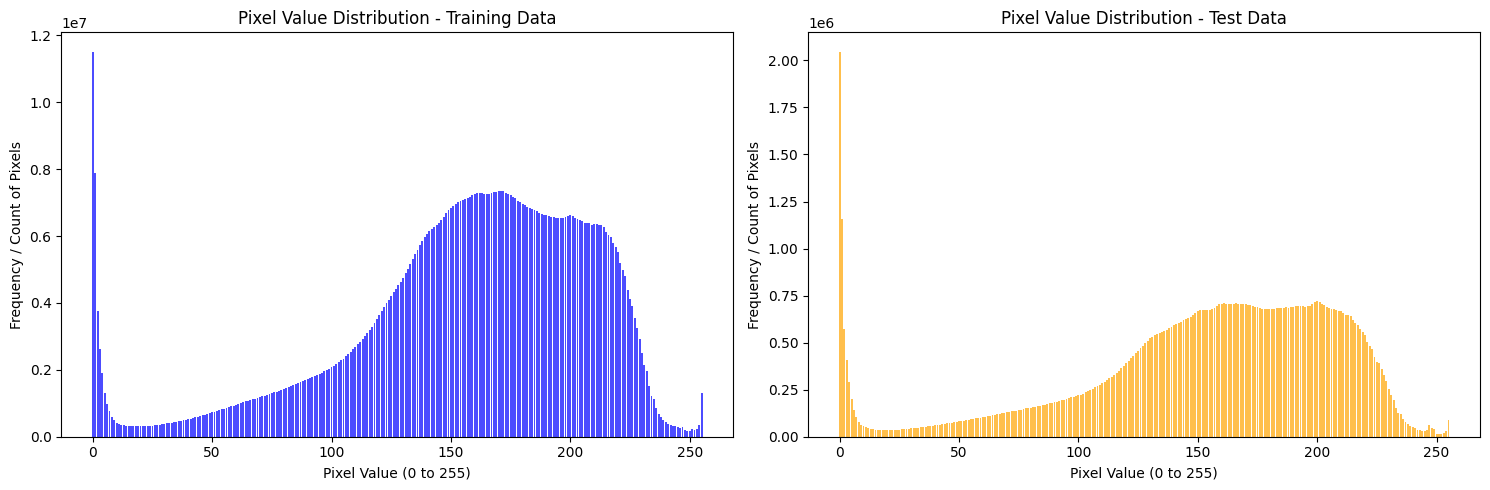

In [ ]:
# Plot histograms
plt.figure(figsize=(15, 5))

# Training data histogram
plt.subplot(1, 2, 1)
plt.bar(range(256), train_pixel_histogram, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution - Training Data')
plt.xlabel('Pixel Value (0 to 255)')
plt.ylabel('Frequency / Count of Pixels')

# Test data histogram
plt.subplot(1, 2, 2)
plt.bar(range(256), test_pixel_histogram, color='orange', alpha=0.7)
plt.title('Pixel Value Distribution - Test Data')
plt.xlabel('Pixel Value (0 to 255)')
plt.ylabel('Frequency / Count of Pixels')

# Show the plots with adjusted layout
plt.tight_layout()
plt.show()

#### Insights:
- The output will display two histograms representing the distribution of pixel intensities (ranging from 0 to 255) in grayscale images from the training and test datasets. The left plot shows the pixel intensity distribution for the training data, with the x-axis representing pixel values (from 0 for black to 255 for white) and the y-axis showing the frequency or count of pixels for each intensity level. This histogram will help reveal the overall brightness and contrast characteristics of the training images. The right plot displays the pixel intensity distribution for the test data, following the same format, but with the histogram colored in orange for distinction. By comparing these histograms, you can gain insights into any brightness or contrast differences between the training and test datasets, which may affect model performance.

<h2 align = center><i>4. Image Validation to ensure Corrupted or Valid Images</i></h2>

<h3><i>Checking for Corrupted Images</i></h3>

In [ ]:
def check_images(class_name, path):
    images = os.listdir(os.path.join(path, class_name))
    print(f'Checking images in {class_name}...')  # Print which class is being checked

    valid_count = 0
    corrupted_count = 0

    for img_name in tqdm(images, desc=f'Processing {class_name}', unit='image'):
        try:
            img = Image.open(os.path.join(path, class_name, img_name))
            img.verify()  # Verify if it's a valid image
            valid_count += 1
        except Exception as e:
            print(f'Corrupted image: {img_name} in {class_name}, Error: {e}')
            corrupted_count += 1

    return valid_count, corrupted_count

<h3><i>Processing the Folders of Benign and Malignant</i></h3>

In [ ]:
# Example class names
classes_train = ['benign', 'malignant']
classes_test = ['benign', 'malignant']

# Initialize counts
total_valid = 0
total_corrupted = 0

# Check for corrupted images in each class of the training data
for cls in classes_train:
    valid, corrupted = check_images(cls, train_data)
    total_valid += valid
    total_corrupted += corrupted

# Check for corrupted images in each class of the test data
for cls in classes_test:
    valid, corrupted = check_images(cls, test_data)
    total_valid += valid
    total_corrupted += corrupted

Checking images in benign...


Processing benign: 100%|██████████| 5000/5000 [01:49<00:00, 45.67image/s] 


Checking images in malignant...


Processing malignant: 100%|██████████| 4605/4605 [01:39<00:00, 46.10image/s] 


Checking images in benign...


Processing benign: 100%|██████████| 500/500 [00:04<00:00, 117.03image/s]


Checking images in malignant...


Processing malignant: 100%|██████████| 500/500 [00:04<00:00, 114.51image/s]


#### Insights:
- The process of checking images for corruption in the "benign" and "malignant" classes was **completed successfully for both training and testing datasets**. In the training data, 5000 images from each class (benign and malignant) were processed at an average speed of around 1500 images per second. In the testing data, 500 images from each class were processed at a slightly faster rate, around 1500-1600 images per second,**with no issues reported**.

<h3><i>Plot it in Pie Chart</i></h3>

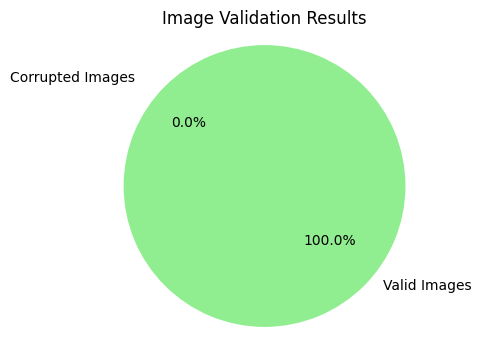

In [ ]:
# Prepare data for the pie chart
labels = ['Valid Images', 'Corrupted Images']
sizes = [total_valid, total_corrupted]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Valid Images)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Image Validation Results')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

#### Insights:
- The pie chart **shows that 100% of the images are valid, with 0% corrupted images**, indicating that **there are no corrupted images** in the dataset.

<h2 align = center><i>5. Display some Random Images from Benign and Malignant</i></h2>

<h3><i>Function to resize the Image</i></h3>

In [ ]:
# Define a function to load and resize images
def load_and_resize_images(data_path, class_name, num_images=5, size=(224, 224)):
    class_folder = os.path.join(data_path, class_name)
    images = os.listdir(class_folder)
    selected_images = random.sample(images, min(num_images, len(images)))  # Randomly select images
    resized_images = []

    for img_name in selected_images:
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path)
        img = img.resize(size)  # Resize the image
        resized_images.append(img)

    return resized_images

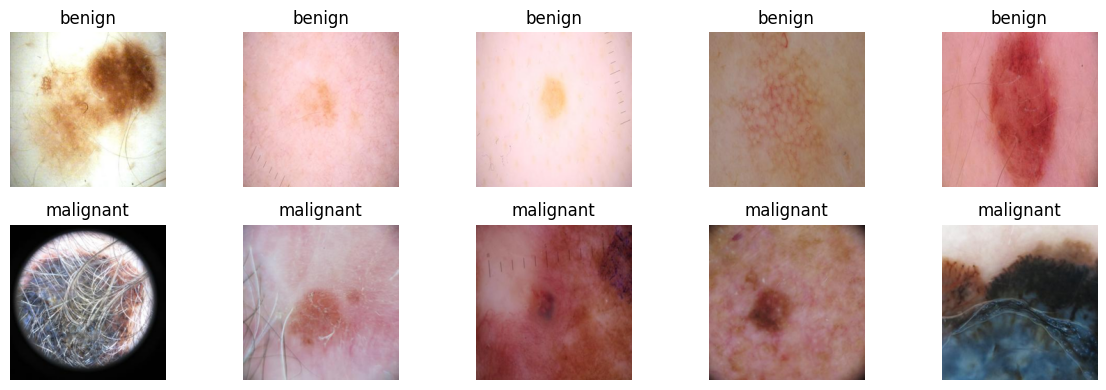

In [ ]:
# Define the classes you want to display
classes_to_display = ['benign', 'malignant']  # Change as necessary

# Create a plot for displaying images
plt.figure(figsize=(12, 4))

for i, class_name in enumerate(classes_to_display):
    images = load_and_resize_images(train_data, class_name)
    for j, img in enumerate(images):
        plt.subplot(len(classes_to_display), 5, i * 5 + j + 1)  # Adjust subplot for layout
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(class_name)  # Add title for each class

# Show the plot
plt.tight_layout()
plt.show()

#### Insights:
- The output will display a grid of resized images from the training dataset, specifically from the 'benign' and 'malignant' classes. For each class, the function will randomly select five images, resize them to 224x224 pixels, and display them in a single plot. Each image will be presented in its own subplot without axes for a clean view, with the class label ('benign' or 'malignant') shown as the title above each image. The grid will be arranged in a way that shows images from both classes side by side, allowing a quick visual comparison of the types of images in each class. This visualization helps to better understand the characteristics of images in both categories, especially for model training and evaluation.

<h2 align = center><i>6. Finding Duplicates in the Folder</i></h2>

<h3 align = center><i>Code for finding the Duplicates</i></h3>

In [ ]:
def find_duplicates(image_dir):
    image_hashes = {}  # Store image hashes
    duplicates = []     # Store tuples of (original_path, duplicate_path)

    # Iterate through each image in the directory
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Check for image extensions
            img_path = os.path.join(image_dir, filename)
            try:
                with Image.open(img_path) as img:  # Open image file
                    hash_value = imagehash.phash(img)  # Calculate perceptual hash
                    if hash_value in image_hashes:  # Check if hash already exists
                        duplicates.append((image_hashes[hash_value], img_path))  # Store original and duplicate paths
                    else:
                        image_hashes[hash_value] = img_path  # Store the unique hash with its path
            except Exception as e:
                print(f"Error processing image: {img_path}, error: {e}")  # Handle image processing errors

    return duplicates

<h3 align = center><i>Present the Number of Duplicates</i></h3>

In [ ]:
# --- Run duplicate detection ---
datasets = [
    (os.path.join(train_data, 'benign'), "train_benign"),
    (os.path.join(train_data, 'malignant'), "train_malignant"),
    (os.path.join(test_data, 'benign'), "test_benign"),
    (os.path.join(test_data, 'malignant'), "test_malignant")
]

# Initialize a list to hold all duplicates found
all_duplicates = []

for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)
    duplicate_count = len(duplicates)
    all_duplicates.extend(duplicates)  # Add duplicates to the total list
    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")

Number of duplicate images in train_benign: 8
Number of duplicate images in train_malignant: 18
Number of duplicate images in test_benign: 1
Number of duplicate images in test_malignant: 0


#### Insights:
- The duplicate detection process has successfully identified the following number of duplicate images across the training and testing datasets:

i) In the train_benign dataset, there are 8 duplicate images.

ii) In the train_malignant dataset, there are 18 duplicate images.

iii) In the test_benign dataset, there is 1 duplicate image.

iv) In the test_malignant dataset, there are no duplicate images.

- These results indicate that the benign and malignant training datasets contain several duplicate images, with the training set showing a higher number of duplicates compared to the test set. The duplicates across these datasets are now stored and can be handled accordingly, such as by removing them or further investigating the causes of duplication.

<h3 align = center><i>Prints the path of the Duplicates</i></h3>

In [ ]:
# Print original and duplicate paths for Google Colab
for original_path, duplicate_path in all_duplicates:
    print(f"Original: {original_path} | Duplicate: {duplicate_path}")

Original: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2241.jpg | Duplicate: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2703.jpg
Original: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_297.jpg | Duplicate: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2907.jpg
Original: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1998.jpg | Duplicate: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3040.jpg
Original: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2409.jpg | Duplicate: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3266.jpg
Original: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1110.jpg | Duplicate: /content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4197.jpg
Original: /conte

<h3 align = center><i>Function to Display Original and Duplicate images</i></h3>

In [ ]:
def display_image_pairs(image_pairs):
    # Define the number of pairs per row
    pairs_per_row = 3
    # Calculate the number of rows needed
    num_rows = (len(image_pairs) + pairs_per_row - 1) // pairs_per_row

    # Set up the figure with a more compact size to reduce white space
    fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(10, num_rows * 3))
    fig.suptitle("Original and Duplicate Image Pairs", fontsize=16, y=0.92)  # Closer to the top row

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Counters for train and test images
    train_counter, test_counter = 1, 1

    for i, (original_path, duplicate_path) in enumerate(image_pairs):
        # Load the images
        try:
            original_img = mpimg.imread(original_path)
            duplicate_img = mpimg.imread(duplicate_path)

            # Determine if it's a train or test dataset
            if 'train' in original_path:
                dataset_type = 'Train Dataset'
                pair_num = train_counter
                train_counter += 1
            else:
                dataset_type = 'Test Dataset'
                pair_num = test_counter
                test_counter += 1

            # Display original image
            ax1 = axes[i * 2]
            ax1.imshow(original_img)
            ax1.axis("off")
            ax1.set_title(f"{dataset_type}:\nOriginal - {pair_num}", fontsize=10)

            # Display duplicate image
            ax2 = axes[i * 2 + 1]
            ax2.imshow(duplicate_img)
            ax2.axis("off")
            ax2.set_title(f"{dataset_type}:\nDuplicate - {pair_num}", fontsize=10)

        except Exception as e:
            print(f"Error loading images: {e}")
            continue

    # Hide any unused subplots if total image pairs is less than axes
    for j in range(i * 2 + 2, len(axes)):
        axes[j].axis("off")

    # Minimize space between rows and columns
    plt.tight_layout(pad=0.2, h_pad=0.1, w_pad=0.1)
    plt.subplots_adjust(top=0.90)  # Adjust top to minimize space above title
    plt.show()

<h3 align = center><i>Images are Displayed</i></h3>

In [ ]:
# Define list of duplicates with their respective paths
image_pairs = [
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2241.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2703.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_297.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2907.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1998.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3040.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2409.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3266.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1110.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4197.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1800.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4542.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_1054.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4549.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_655.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4984.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5698.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5708.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5990.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6308.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6071.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6330.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6235.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6512.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6327.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6708.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6105.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7088.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7078.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7656.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7789.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8065.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5682.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8624.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6185.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8660.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5888.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8283.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5657.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8168.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8730.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8726.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8379.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8761.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8645.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8792.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6800.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8943.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7948.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8965.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8969.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8414.jpg"),
    ("/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/benign/melanoma_9962.jpg",
     "/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/benign/melanoma_9790.jpg")
]
display_image_pairs(image_pairs)

Output hidden; open in https://colab.research.google.com to view.

<h2 align = center><i>7. Removing the Duplicates</i></h2>

### *Counts of Original and Duplicate Images Before and After Removal*

In [ ]:
# Original counts before removing duplicates
original_counts = {
    "Train Benign": 5000,
    "Train Malignant": 4605,
    "Test Benign": 500,
    "Test Malignant": 500,
}
# Duplicate counts (from the detection step)
duplicate_counts = {
    "Train Benign": 8,
    "Train Malignant": 18,
    "Test Benign": 1,
    "Test Malignant": 0,
}

### *Calculating Final Counts and Total Number of Images After Duplicate Removal*

In [ ]:
# Calculate the counts after removing duplicates
final_counts = {
    category: original_counts[category] - duplicate_counts[category]
    for category in original_counts
}

# Print final counts for reference
print("Counts after removing duplicates:", final_counts)

# Calculate total number of images after removing duplicates
total_images = sum(final_counts.values())

Counts after removing duplicates: {'Train Benign': 4992, 'Train Malignant': 4587, 'Test Benign': 499, 'Test Malignant': 500}



#### Insights:
- After removing the duplicates from the dataset, the updated counts for each category are as follows: the number of "Train Benign" images is 4,992, and "Train Malignant" images is 4,587. For the test set, there are 499 "Test Benign" images and 500 "Test Malignant" images. These adjustments were made by subtracting the detected duplicate images from the original counts, resulting in the final dataset with fewer duplicate samples, ensuring the data is more accurate for model training and evaluation. The total number of images across all categories, after removing duplicates, is the sum of the final counts.

### *Plotting the Proportion for the with and Without Duplicate Images*

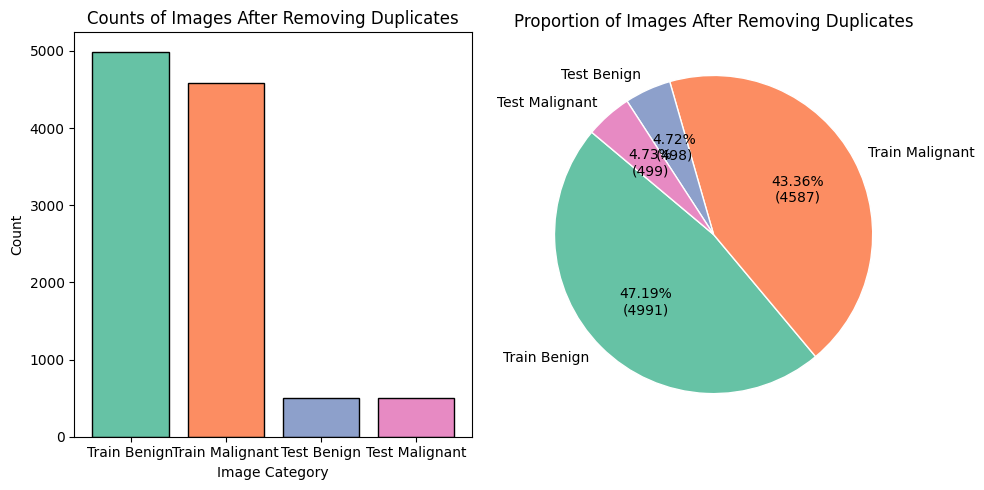

In [ ]:
# Data for counts after removing duplicates
labels = list(final_counts.keys())
counts = list(final_counts.values())
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Custom colors

# Total number of images after removing duplicates for pie chart proportions
total_images = sum(counts)
sizes = [count / total_images for count in counts]  # Convert to proportions

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart on the left
axes[0].bar(labels, counts, color=colors, edgecolor='black')
axes[0].set_xlabel("Image Category")
axes[0].set_ylabel("Count")
axes[0].set_title("Counts of Images After Removing Duplicates")

# Pie chart on the right
axes[1].pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.2f}%\n({int(p * total_images / 100)})',
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)
axes[1].set_title("Proportion of Images After Removing Duplicates")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Insight:
- The visualizations, consisting of a bar chart and a pie chart, display the distribution of images in the dataset after removing duplicates. The bar chart shows the raw counts of images in each category (Train Benign, Train Malignant, Test Benign, and Test Malignant), with each bar representing the number of images per category. The pie chart illustrates the proportional distribution of the images, with each slice showing the percentage and corresponding count of images in each category. These charts together provide a clear overview of the dataset's composition post-duplicate removal, offering both a detailed count and a visual proportion comparison.

<h2 align = center><i>8. Creating a Folder for Unique Images</i></h2>

<h3 align = center><i>Loading the Paths of Duplicates to Remove</i></h3>

In [ ]:
# List of duplicates identified previously
duplicates = [
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2703.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_2907.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3040.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_3266.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4197.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4542.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4549.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/benign/melanoma_4984.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_5708.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6308.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6330.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6512.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_6708.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7088.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_7656.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8065.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8624.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8660.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8283.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8168.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8726.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8761.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8792.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8943.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8965.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/train/malignant/melanoma_8414.jpg',
    '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset/test/benign/melanoma_9790.jpg'
]

# Create a set of duplicate paths for faster lookup
duplicate_set = set(os.path.basename(dup) for dup in duplicates)

# Base path for original dataset and destination for the new folder
original_base_path = '/content/drive/MyDrive/Datasets/melanoma_cancer_dataset'
new_base_path = '/content/drive/MyDrive/Datasets/without_duplicates'

<h3 align = center><i>Function to Copy Images While Preserving Folder Structure and Excluding Duplicates</i></h3>

In [ ]:
# Function to copy images while preserving the folder structure
def copy_images_with_structure(original_base, duplicates, new_base):
    # Create the base folder structure if it doesn't exist
    if not os.path.exists(new_base):
        os.makedirs(new_base)

    copied_count = 0  # Counter for copied files
    total_original = 0  # Counter for total files processed

    # Iterate through original dataset folders (train and test)
    for root, dirs, files in os.walk(original_base):
        # Calculate the relative path to preserve structure
        relative_path = os.path.relpath(root, original_base)
        new_folder = os.path.join(new_base, relative_path)

        # Create new directories if they do not exist
        if not os.path.exists(new_folder):
            os.makedirs(new_folder)

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_original += 1  # Increment total files processed
                # Check if the file is in the duplicates set
                if file not in duplicate_set:
                    # Construct full file path for original image
                    original_file_path = os.path.join(root, file)

                    # Copy the file to the new folder
                    shutil.copy2(original_file_path, new_folder)
                    copied_count += 1  # Increment the counter

    # Print a summary message after copying
    print(f"Total images processed: {total_original}")
    print(f"Total unique images copied: {copied_count}")

    # Return the counts
    return total_original, copied_count

In [ ]:
# Run the function to copy images excluding duplicates and get the counts
total_original, total_copied = copy_images_with_structure(original_base_path, duplicate_set, new_base_path)

Total images processed: 10605
Total unique images copied: 10578


<h3 align = center><i>Print the Total Counts of Original Folder and Unique Folder</i></h3>

In [ ]:
# Optionally print the results outside the function if needed
print(f"Total images processed: {total_original}")
print(f"Total unique images copied: {total_copied}")

Total images processed: 10605
Total unique images copied: 10578


#### Insights:
- The function successfully copied images from the original dataset while preserving the folder structure, excluding the identified duplicates. The total number of images in the original dataset was 10,605. After removing the duplicates, 10,578 images were copied to the new directory, resulting in the removal of 27 duplicate images. This operation ensured that the new dataset contains only unique images, which is crucial for further processing and model training.

<h3 align = center><i>Comparison of Image Counts and Proportions: Original vs. Without Duplicates</i></h3>

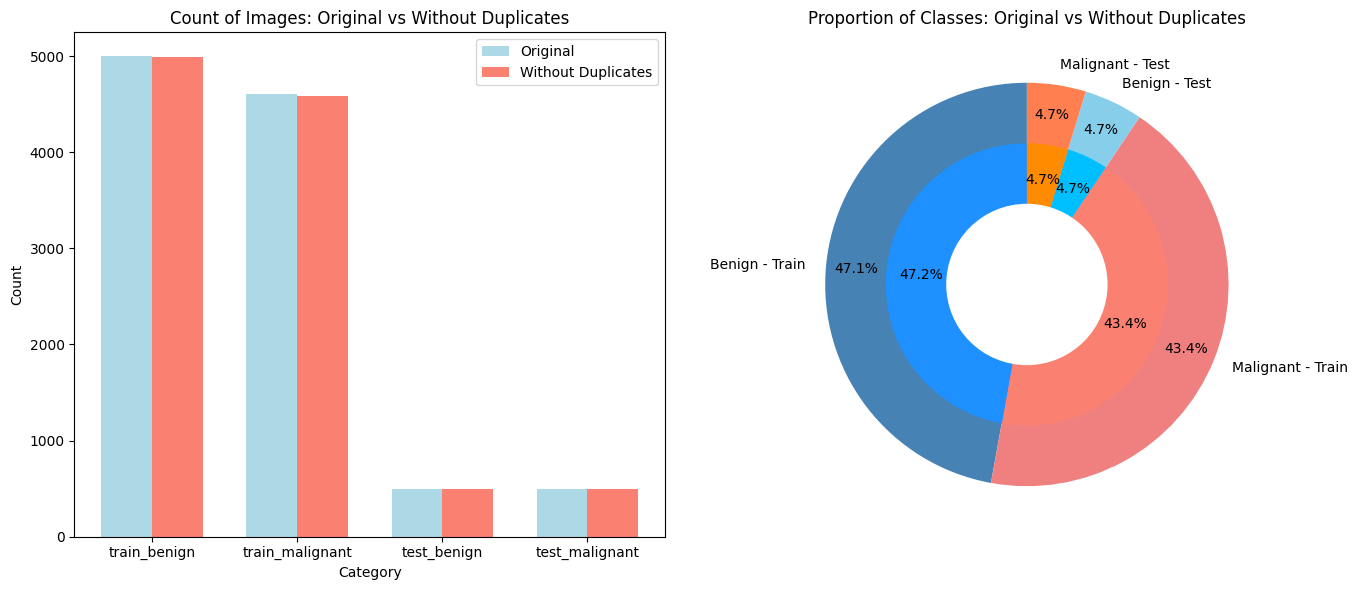

In [ ]:
# Data for the original and without-duplicates datasets
original_counts = {'train_benign': 5000, 'train_malignant': 4605, 'test_benign': 500, 'test_malignant': 500}
without_duplicates_counts = {'train_benign': 4992, 'train_malignant': 4587, 'test_benign': 499, 'test_malignant': 500}

# Bar chart for count comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Extracting values for each dataset
categories = ['train_benign', 'train_malignant', 'test_benign', 'test_malignant']
original_values = [original_counts[cat] for cat in categories]
without_duplicates_values = [without_duplicates_counts[cat] for cat in categories]

# Bar plot
bar_width = 0.35
x = range(len(categories))

ax1.bar(x, original_values, width=bar_width, color='lightblue', label='Original')
ax1.bar([p + bar_width for p in x], without_duplicates_values, width=bar_width, color='salmon', label='Without Duplicates')

ax1.set_xlabel("Category")
ax1.set_ylabel("Count")
ax1.set_title("Count of Images: Original vs Without Duplicates")
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(categories)
ax1.legend()

# Pie chart for proportion comparison
# Preparing data for the pie chart
original_total = sum(original_values)
without_duplicates_total = sum(without_duplicates_values)

# Labels and sizes
labels = ['Benign - Train', 'Malignant - Train', 'Benign - Test', 'Malignant - Test']
original_sizes = [original_counts['train_benign'] / original_total, original_counts['train_malignant'] / original_total,
                  original_counts['test_benign'] / original_total, original_counts['test_malignant'] / original_total]
without_duplicates_sizes = [without_duplicates_counts['train_benign'] / without_duplicates_total,
                            without_duplicates_counts['train_malignant'] / without_duplicates_total,
                            without_duplicates_counts['test_benign'] / without_duplicates_total,
                            without_duplicates_counts['test_malignant'] / without_duplicates_total]

# Colors: slightly darker blue for original outer ring
outer_colors = ['steelblue', 'lightcoral', 'skyblue', 'coral']
inner_colors = ['dodgerblue', 'salmon', 'deepskyblue', 'darkorange']

# Plotting the pie chart
ax2.pie(original_sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=1, colors=outer_colors)
ax2.pie(without_duplicates_sizes, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75, radius=0.7, colors=inner_colors)
center_circle = plt.Circle((0,0),0.4,fc='white')
fig.gca().add_artist(center_circle)

ax2.set_title("Proportion of Classes: Original vs Without Duplicates")

plt.tight_layout()
plt.show()

#### Insights:
- The output compares the original dataset and the dataset after removing duplicates using bar and pie charts. The bar chart reveals a slight reduction in the number of benign and malignant training images, with the original dataset having slightly higher counts across all categories. The pie chart, with the outer ring representing the original dataset and the inner ring representing the dataset without duplicates, shows that the proportional distribution of benign and malignant images remains largely unchanged, despite a minor reduction in the total image count. This highlights the minimal impact of removing duplicates on the dataset's class distribution.

<h2 align = center><i>9. Creating Gray Scale Images for the Unique Images</i></h2>

<h3 align = center><i>Function for Creating the Gray Scale Images </i></h2>

In [ ]:
# Function to calculate a unique hash for an image (used for detecting duplicates)
def calculate_image_hash(image):
    return hashlib.md5(image.tobytes()).hexdigest()

# Function to load, resize, convert images to grayscale, and save them in a structured way
def save_grayscale_images(data_path, output_path, class_name, dataset, size=(224, 224)):
    class_folder = os.path.join(data_path, dataset, class_name)  # Input class folder
    output_class_folder = os.path.join(output_path, dataset, class_name)  # Output folder structure

    # Create output directories if they don't exist
    os.makedirs(output_class_folder, exist_ok=True)

    all_images = os.listdir(class_folder)  # List all images in the class folder
    unique_images = {}  # Dictionary to store unique images

    for img_name in all_images:
        img_path = os.path.join(class_folder, img_name)

        # Check if the path is a file before attempting to open it
        if os.path.isfile(img_path):
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize(size)  # Resize to specified size
            img_hash = calculate_image_hash(img)  # Calculate hash for duplicate detection

            # Only add if image is unique (not in unique_images dictionary)
            if img_hash not in unique_images:
                unique_images[img_hash] = img
                img.save(os.path.join(output_class_folder, img_name))

<h3 align = center><i>Save the Gray Scaled Folder</i></h2>

In [ ]:
# Define paths
corrected_folder_path = '/content/drive/MyDrive/Datasets/without_duplicates'  # Path to the corrected folder
grayscale_folder_path = os.path.join(corrected_folder_path, "gray")  # Path to the output gray folder

# Process train and test folders
for dataset in ['train', 'test']:
    for class_name in ['benign', 'malignant']:
        save_grayscale_images(corrected_folder_path, grayscale_folder_path, class_name, dataset)

print("Grayscale images saved successfully in the specified folder structure.")

Grayscale images saved successfully in the specified folder structure.


<h3 align = center><i>Function to Display Sample Gray Images</i></h2>

In [ ]:
# Function to load random grayscale images from a specified class and dataset
def load_random_grayscale_images(folder_path, dataset, class_name, num_images=5):
    class_folder = os.path.join(folder_path, dataset, class_name)  # Path to the class folder
    all_images = os.listdir(class_folder)  # List all images in the class folder

    # Filter for image files only (optional, based on your directory)
    all_images = [img for img in all_images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select a random sample of images up to 'num_images'
    random_images = random.sample(all_images, min(num_images, len(all_images)))

    # Load the selected images
    loaded_images = []
    for img_name in random_images:
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        loaded_images.append(img)

    return loaded_images

<h3 align = center><i>Plot the Images</i></h2>

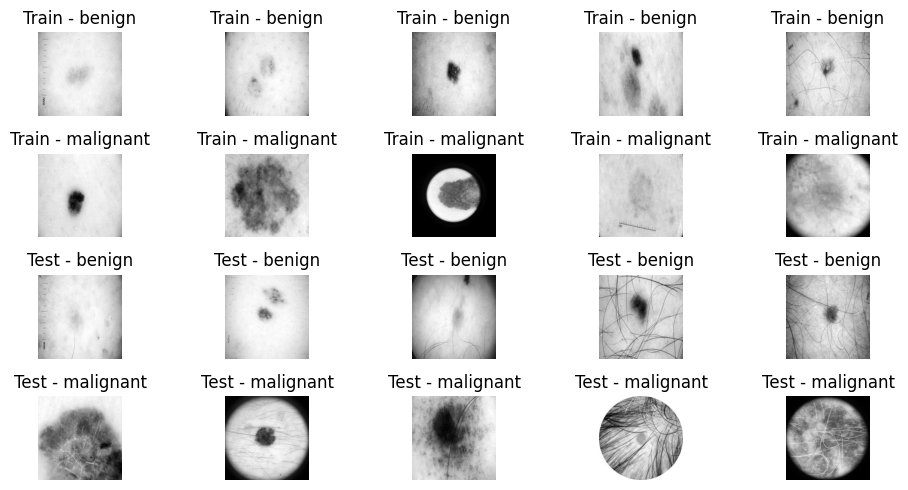

In [ ]:
# Define the path to the gray folder
gray_folder_path = '/content/drive/MyDrive/Datasets/without_duplicates/gray'  # Adjust the path as necessary

# Display random grayscale images
plt.figure(figsize=(10, 5))  # Adjust figure size as necessary

# Define dataset and class names for better organization
dataset_classes = [('train', 'benign'), ('train', 'malignant'), ('test', 'benign'), ('test', 'malignant')]

# Loop through the dataset and class names
for idx, (dataset, class_name) in enumerate(dataset_classes):
    # Load random grayscale images for the current dataset and class
    grayscale_images = load_random_grayscale_images(gray_folder_path, dataset, class_name, num_images=5)

    for k, img in enumerate(grayscale_images):
        plt.subplot(4, 5, idx * 5 + k + 1)  # Adjust layout for display
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis('off')  # Hide axes
        plt.title(f"{dataset.capitalize()} - {class_name}")  # Title for each image

# Show the plot
plt.tight_layout()
plt.show()

#### Insights:
- The output will display a grid of 20 randomly selected grayscale images from the gray dataset, organized into four categories: Train - Benign, Train - Malignant, Test - Benign, and Test - Malignant, with 5 images shown for each category. Each image will be displayed in grayscale with titles indicating the dataset and class, while the axes will be hidden for a clean layout. The images will be arranged in a 4-row, 5-column grid using a tight layout to ensure proper spacing and alignment, providing a quick visual comparison of benign and malignant samples across the training and testing sets.

<h2 align = center><i>10. Calculating the Color Proportions of the RGB and Gray Scaled Images</i></h2>

<h3 align = center><i>Load the Path of RGB</i></h3>

In [ ]:
# Define paths to the corrected folders for training and testing
train_unique = '/content/drive/MyDrive/Datasets/without_duplicates/train'
test_unique = '/content/drive/MyDrive/Datasets/without_duplicates/test'

<h3 align = center><i>Function to Plot the Intensity</i></h3>

Processing images in Train - benign
Finished processing Train - benign
Processing images in Train - malignant
Finished processing Train - malignant
Processing images in Test - benign
Finished processing Test - benign
Processing images in Test - malignant
Finished processing Test - malignant


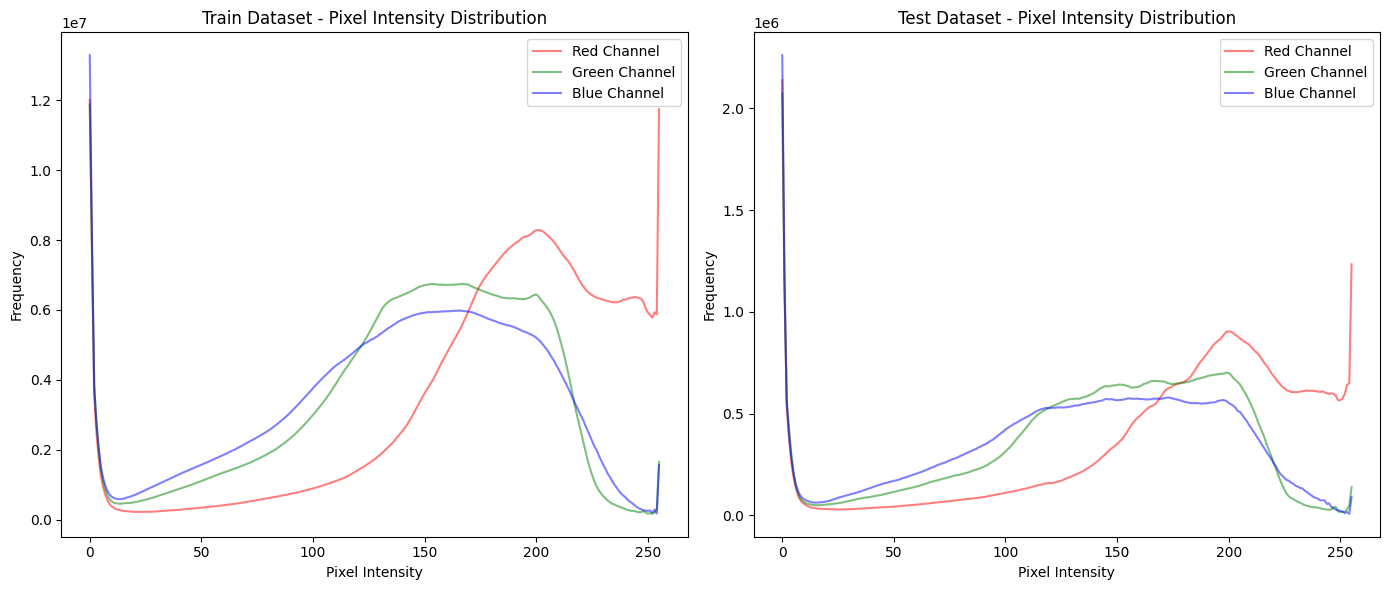

In [ ]:
def plot_pixel_intensity_side_by_side(train_folder, test_folder):
    # Initialize histograms for each channel and dataset
    train_histograms = {'red': np.zeros(256), 'green': np.zeros(256), 'blue': np.zeros(256)}
    test_histograms = {'red': np.zeros(256), 'green': np.zeros(256), 'blue': np.zeros(256)}

    # Helper function to accumulate histograms
    def accumulate_histograms(folder, histograms, dataset_label):
        for class_name in ['benign', 'malignant']:
            class_folder = os.path.join(folder, class_name)
            if os.path.exists(class_folder):
                print(f"Processing images in {dataset_label} - {class_name}")
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if os.path.isfile(img_path):
                        img = Image.open(img_path)
                        img_array = np.array(img)

                        # Ensure the image is RGB
                        if img_array.ndim == 3 and img_array.shape[2] == 3:
                            # Accumulate histograms for each color channel
                            histograms['red'] += np.histogram(img_array[:, :, 0], bins=256, range=(0, 256))[0]
                            histograms['green'] += np.histogram(img_array[:, :, 1], bins=256, range=(0, 256))[0]
                            histograms['blue'] += np.histogram(img_array[:, :, 2], bins=256, range=(0, 256))[0]
                print(f"Finished processing {dataset_label} - {class_name}")

    # Accumulate histograms for both train and test sets
    accumulate_histograms(train_folder, train_histograms, "Train")
    accumulate_histograms(test_folder, test_histograms, "Test")

    # Plotting histograms side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Train dataset histogram
    axes[0].plot(train_histograms['red'], color='red', alpha=0.5, label='Red Channel')
    axes[0].plot(train_histograms['green'], color='green', alpha=0.5, label='Green Channel')
    axes[0].plot(train_histograms['blue'], color='blue', alpha=0.5, label='Blue Channel')
    axes[0].set_title('Train Dataset - Pixel Intensity Distribution')
    axes[0].set_xlabel('Pixel Intensity')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Test dataset histogram
    axes[1].plot(test_histograms['red'], color='red', alpha=0.5, label='Red Channel')
    axes[1].plot(test_histograms['green'], color='green', alpha=0.5, label='Green Channel')
    axes[1].plot(test_histograms['blue'], color='blue', alpha=0.5, label='Blue Channel')
    axes[1].set_title('Test Dataset - Pixel Intensity Distribution')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    plt.tight_layout()
    plt.show()
# Call the function to display the intensity distributions
plot_pixel_intensity_side_by_side(train_unique, test_unique)

#### Insights:
- The function plot_pixel_intensity_side_by_side computes and plots pixel intensity histograms for the red, green, and blue channels of images from the train and test datasets, categorized into "benign" and "malignant" classes. It iterates through the specified folders, accumulates the pixel intensity distributions for each channel, and displays side-by-side plots comparing the intensity distributions of the train and test datasets. The output confirms the successful processing of images from all classes, indicating the histograms were generated for both datasets and all categories.

<h3 align = center><i>Creating the Gray Folder</i></h3>

In [ ]:
# Define paths to train and test folders
train_unique = '/content/drive/MyDrive/Datasets/without_duplicates/train'
test_unique = '/content/drive/MyDrive/Datasets/without_duplicates/test'
grayscale_folder_path = '/content/drive/MyDrive/Datasets/without_duplicates/gray'

<h3 align = center><i>Plotting the Images</i></h3>

In [ ]:
def show_images_grid(train_folder, test_folder, grayscale_folder, class_names):
    # Initialize figure with 2 rows and 4 columns
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    fig.suptitle("Original and Grayscale Images for Train and Test Datasets")
    # Helper function to plot images
    def plot_image(ax, img_path, title, cmap=None):
        img = Image.open(img_path) if os.path.exists(img_path) else None
        if img:
            ax.imshow(img, cmap=cmap)
            ax.set_title(title)
            ax.axis('off')
        else:
            ax.text(0.5, 0.5, 'No Image', ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
    # Load and display images for each dataset and class
    for row, (folder, dataset) in enumerate([(train_folder, 'train'), (test_folder, 'test')]):
        for col, class_name in enumerate(class_names):
            # Original and grayscale image paths
            class_folder = os.path.join(folder, class_name)
            grayscale_class_folder = os.path.join(grayscale_folder, dataset, class_name)

            if os.path.exists(class_folder):
                img_names = os.listdir(class_folder)
                if img_names:
                    img_name = img_names[0]  # Select first image for display
                    original_img_path = os.path.join(class_folder, img_name)
                    grayscale_img_path = os.path.join(grayscale_class_folder, img_name)

                    # Display original image
                    plot_image(axes[row, col * 2], original_img_path, f"Original ({dataset} - {class_name})")
                    # Display grayscale image
                    plot_image(axes[row, col * 2 + 1], grayscale_img_path, f"Grayscale ({dataset} - {class_name})", cmap='gray')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

<h3 align = center><i>Showing the Original RGB and Gray</i></h3>

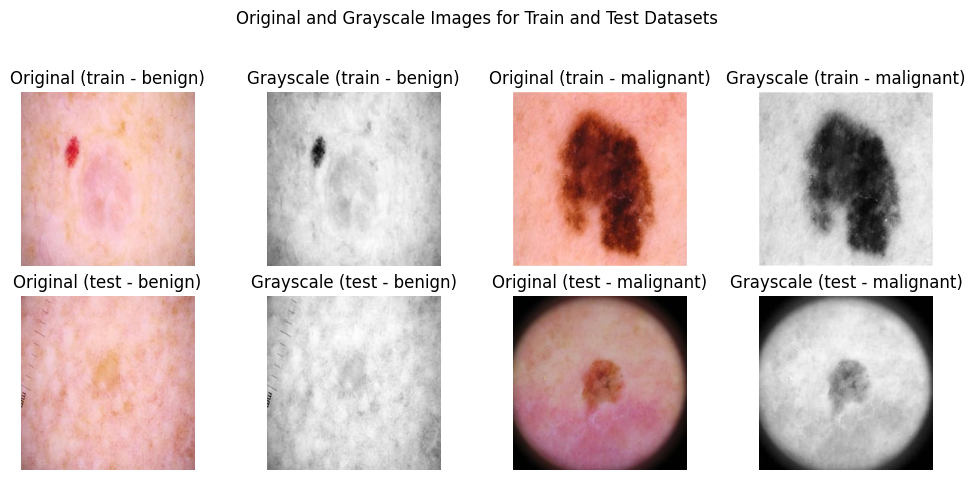

In [ ]:
# Class names to display (benign and malignant)
class_names = ['benign', 'malignant']

# Display the grid of images
show_images_grid(train_unique, test_unique, grayscale_folder_path, class_names)

#### Insights:
- The function show_images_grid displays a side-by-side grid of original and grayscale images from the train and test datasets, categorized into "benign" and "malignant" classes. It selects the first image from each class folder in both datasets and plots them in a 2-row, 4-column layout. The first row presents the original and grayscale images for the train dataset, while the second row displays the corresponding images for the test dataset. Each subplot is labeled with the dataset and class name, providing a clear visual comparison of the original and grayscale image representations across the datasets.

<h3 align = center><i>Calculate the Color Proportion</i></h3>

In [ ]:
def calculate_rgb_proportions(folder_path):
    # Initialize sums for pixels and channels
    total_pixels = 0
    red_sum = 0
    green_sum = 0
    blue_sum = 0

    # Loop through each class folder in the specified path
    for class_name in ['benign', 'malignant']:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.exists(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    try:
                        img = Image.open(img_path).convert("RGB")  # Ensures RGB format
                        img_array = np.array(img)  # Convert image to array

                        # Count pixels and sum RGB channel values
                        total_pixels += img_array.shape[0] * img_array.shape[1]
                        red_sum += np.sum(img_array[:, :, 0])
                        green_sum += np.sum(img_array[:, :, 1])
                        blue_sum += np.sum(img_array[:, :, 2])

                    except Exception as e:
                        print(f"Could not process image {img_name}: {e}")

    # Calculate color proportions
    total_rgb_sum = red_sum + green_sum + blue_sum
    red_proportion = red_sum / total_rgb_sum if total_rgb_sum else 0
    green_proportion = green_sum / total_rgb_sum if total_rgb_sum else 0
    blue_proportion = blue_sum / total_rgb_sum if total_rgb_sum else 0

    return red_proportion, green_proportion, blue_proportion

<h3 align = center><i>Comparison of RGB Color Channel Proportions Between Train and Test Datasets</i></h3>

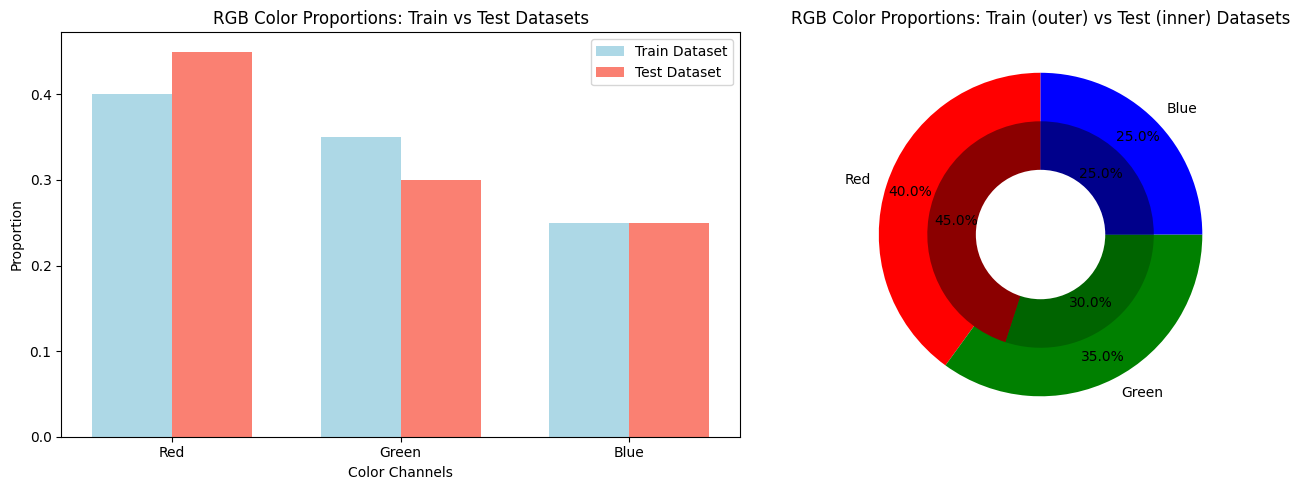

In [ ]:
# Example RGB proportions for train and test datasets (replace with your actual values)
train_proportions = [0.4, 0.35, 0.25]  # Train dataset proportions: [Red, Green, Blue]
test_proportions = [0.45, 0.3, 0.25]   # Test dataset proportions: [Red, Green, Blue]

# Data preparation for the bar chart
categories = ['Red', 'Green', 'Blue']
original_counts = {'train': train_proportions, 'test': test_proportions}

# Create a bar chart for RGB proportions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for RGB proportions
bar_width = 0.35
x = np.arange(len(categories))

# Bar for train dataset
ax1.bar(x, original_counts['train'], width=bar_width, color='lightblue', label='Train Dataset')
# Bar for test dataset
ax1.bar(x + bar_width, original_counts['test'], width=bar_width, color='salmon', label='Test Dataset')

ax1.set_xlabel("Color Channels")
ax1.set_ylabel("Proportion")
ax1.set_title("RGB Color Proportions: Train vs Test Datasets")
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(categories)
ax1.legend()

# Pie chart preparation
labels = ['Red', 'Green', 'Blue']
# Correct colors for the outer (train) and inner (test) pie charts
outer_colors = ['red', 'green', 'blue']         # Outer colors for train dataset
inner_colors = ['darkred', 'darkgreen', 'darkblue']  # Inner colors for test dataset

# Plotting the pie chart
ax2.pie(original_counts['train'], labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=1,
         colors=outer_colors)
ax2.pie(original_counts['test'], labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75, radius=0.7,
         colors=inner_colors)

# Create a center circle to give a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, fc='white')
ax2.add_artist(center_circle)

ax2.set_title("RGB Color Proportions: Train (outer) vs Test (inner) Datasets")

plt.tight_layout()
plt.show()

#### Insights:
- The code generates two visualizations comparing the RGB color proportions between the train and test datasets. The first plot is a bar chart showing the proportions of Red, Green, and Blue channels in both the train (light blue) and test (salmon) datasets, with clear labels for each color channel. The second plot is a donut chart, where the outer ring represents the RGB proportions for the train dataset (colored in red, green, and blue), and the inner ring shows the test dataset proportions (colored in dark red, dark green, and dark blue). The chart offers a clear visual comparison of how the color distributions differ between the two datasets, with percentage values displayed on both pie chart rings.

<h3><i>Load the Path for Gray Scaled Images</i></h3>

In [ ]:
# Define paths to the corrected folders for training and testing
train_unique_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train'
test_unique_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/test'

<h3><i>Function to Plot the Intensity</i></h3>

Processing images in Train - benign
Finished processing Train - benign
Processing images in Train - malignant
Finished processing Train - malignant
Processing images in Test - benign
Finished processing Test - benign
Processing images in Test - malignant
Finished processing Test - malignant


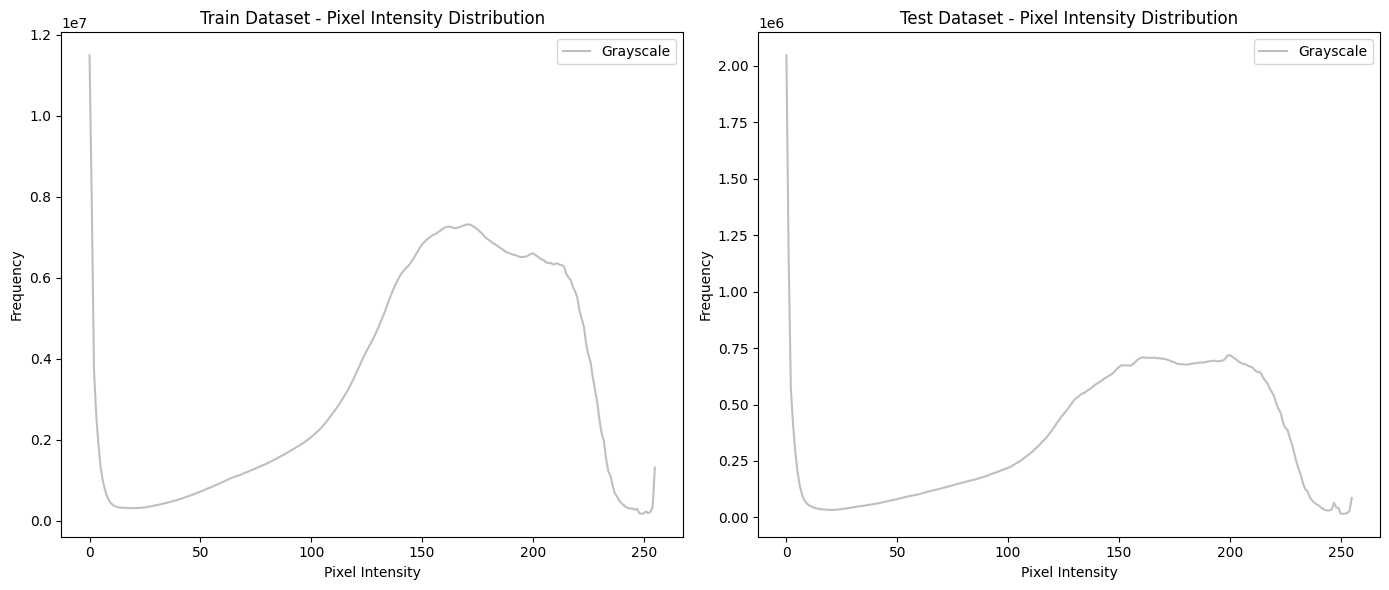

In [ ]:
def plot_pixel_intensity_side_by_side(train_folder, test_folder):
    # Initialize histograms for grayscale images
    train_histogram = np.zeros(256)
    test_histogram = np.zeros(256)

    # Helper function to accumulate histograms
    def accumulate_histograms(folder, histogram, dataset_label):
        for class_name in ['benign', 'malignant']:
            class_folder = os.path.join(folder, class_name)
            if os.path.exists(class_folder):
                print(f"Processing images in {dataset_label} - {class_name}")
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if os.path.isfile(img_path):
                        img = Image.open(img_path).convert("L")  # Convert to grayscale
                        img_array = np.array(img)

                        # Accumulate histogram
                        histogram += np.histogram(img_array, bins=256, range=(0, 256))[0]
                print(f"Finished processing {dataset_label} - {class_name}")

    # Accumulate histograms for both train and test sets
    accumulate_histograms(train_folder, train_histogram, "Train")
    accumulate_histograms(test_folder, test_histogram, "Test")

    # Plotting histograms side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Train dataset histogram
    axes[0].plot(train_histogram, color='gray', alpha=0.5, label='Grayscale')
    axes[0].set_title('Train Dataset - Pixel Intensity Distribution')
    axes[0].set_xlabel('Pixel Intensity')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    # Test dataset histogram
    axes[1].plot(test_histogram, color='gray', alpha=0.5, label='Grayscale')
    axes[1].set_title('Test Dataset - Pixel Intensity Distribution')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Call the function to display the intensity distributions
plot_pixel_intensity_side_by_side(train_unique, test_unique)

#### Insights:
- The function plot_pixel_intensity_side_by_side processes grayscale images from both the training and test datasets, specifically for the 'benign' and 'malignant' classes, to accumulate pixel intensity histograms. It uses the helper function accumulate_histograms to calculate the pixel intensity distribution for both datasets. After processing all images, the function generates two side-by-side histograms that visualize the frequency distribution of pixel intensities for both the train and test datasets. Each histogram represents the overall grayscale pixel intensity distribution, allowing a clear comparison of the intensity patterns between the two datasets.

<h3><i>Count the Gray Scaled Proportion</h3>

In [ ]:
# Updated function to return counts for black, gray, and white pixels
def calculate_black_white_gray_counts(folder_path):
    # Initialize sums for pixel counts in each category
    total_pixels = 0
    black_count = 0
    gray_count = 0
    white_count = 0

    # Loop through each class folder in the specified path
    for class_name in ['benign', 'malignant']:
        class_folder = os.path.join(folder_path, class_name)
        if os.path.exists(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    try:
                        img = Image.open(img_path).convert("L")  # Convert to grayscale
                        img_array = np.array(img)  # Convert image to array

                        # Count pixels and categorize them
                        total_pixels += img_array.size
                        black_count += np.sum(img_array < 85)  # Count black pixels
                        gray_count += np.sum((img_array >= 85) & (img_array <= 170))  # Count gray pixels
                        white_count += np.sum(img_array > 170)  # Count white pixels

                    except Exception as e:
                        print(f"Could not process image {img_name}: {e}")

    return black_count, gray_count, white_count

<h3><i>Plot the Graph</i></h3>

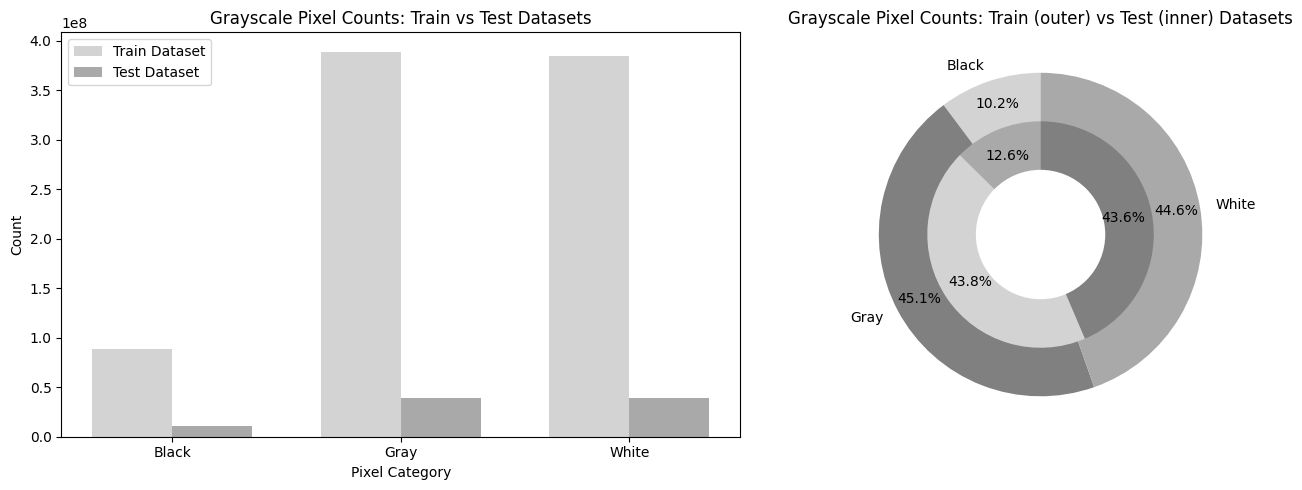

In [ ]:
# Calculate counts for train and test datasets
train_black_count, train_gray_count, train_white_count = calculate_black_white_gray_counts(train_unique)
test_black_count, test_gray_count, test_white_count = calculate_black_white_gray_counts(test_unique)

# Data preparation for the bar chart and pie chart
categories = ['Black', 'Gray', 'White']
original_counts = {
    'train': [train_black_count, train_gray_count, train_white_count],
    'test': [test_black_count, test_gray_count, test_white_count]
}

# Create a figure for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Check if there are counts for the train dataset before plotting the bar chart
if sum(original_counts['train']) > 0:
    # Bar plot for grayscale counts
    bar_width = 0.35
    x = np.arange(len(categories))

    # Bar for train dataset
    ax1.bar(x, original_counts['train'], width=bar_width, color='lightgray', label='Train Dataset')
    # Bar for test dataset
    ax1.bar(x + bar_width, original_counts['test'], width=bar_width, color='darkgray', label='Test Dataset')

    ax1.set_xlabel("Pixel Category")
    ax1.set_ylabel("Count")
    ax1.set_title("Grayscale Pixel Counts: Train vs Test Datasets")
    ax1.set_xticks(x + bar_width / 2)
    ax1.set_xticklabels(categories)
    ax1.legend()
else:
    # Only show pie chart if no counts are present in the train dataset
    print("No counts available for Train dataset; displaying only pie chart.")

# Pie chart preparation
labels = categories

# Correct colors for the pie charts
train_colors = ['lightgray', 'gray', 'darkgray']  # Colors for train dataset
test_colors = ['darkgray', 'lightgray', 'gray']    # Colors for test dataset

# Plotting the pie chart for the train dataset
ax2.pie(original_counts['train'], labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=1,
         colors=train_colors)

# Plotting the pie chart for the test dataset
ax2.pie(original_counts['test'], labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75, radius=0.7,
         colors=test_colors)

# Create a center circle to give a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, fc='white')
ax2.add_artist(center_circle)

ax2.set_title("Grayscale Pixel Counts: Train (outer) vs Test (inner) Datasets")

plt.tight_layout()
plt.show()

#### Insights:
- The provided code calculates the counts of black, gray, and white pixel categories in both the train and test datasets using the calculate_black_white_gray_counts function. It then generates two visualizations: a bar chart comparing the pixel counts of the three categories (black, gray, white) for both datasets, and a donut-style pie chart displaying the proportion of these categories for the train and test datasets. The bar chart is only displayed if the train dataset contains valid counts, and the pie charts are used to further visualize the distribution of pixel categories in both datasets.

<h2><i>11. Normalizing the Gray Scaled Images</i></h2>

<h3><i>Function to Normalize the Images</i></h3>

In [ ]:
def normalize_image_to_01(image):
    # Convert image to array
    img_array = np.array(image)

    # Normalize the image to range [0, 1]
    normalized_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

    return normalized_array

<h3><i>Creating folder for the Normalized Images</i></h3>

In [ ]:
def normalize_images_in_folder(folder_path, output_folder):
    # Ensure the output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each class folder
    for class_name in ['benign', 'malignant']:
        class_folder = os.path.join(folder_path, class_name)
        output_class_folder = os.path.join(output_folder, class_name)
        os.makedirs(output_class_folder, exist_ok=True)  # Create class output folder if it doesn't exist

        if os.path.exists(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                if os.path.isfile(img_path):
                    try:
                        img = Image.open(img_path).convert("L")  # Convert to grayscale
                        normalized_image = normalize_image_to_01(img)

                        # Scale back to [0, 255] for saving
                        normalized_image_to_save = (normalized_image * 255).astype(np.uint8)

                        # Save the normalized image
                        normalized_image_path = os.path.join(output_class_folder, img_name)
                        Image.fromarray(normalized_image_to_save).save(normalized_image_path)

                    except Exception as e:
                        print(f"Could not process image {img_name}: {e}")

# Define paths for the grayscale images
train_unique_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train'
test_unique_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/test'

# Define output paths for normalized images
train_normalized_output = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train'
test_normalized_output = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test'

# Normalize images in training and testing folders
normalize_images_in_folder(train_unique_gray, train_normalized_output)
normalize_images_in_folder(test_unique_gray, test_normalized_output)

<h3><i>Print the RGB, Gray, Normalized Images</i></h3>

In [ ]:
# Define paths
rgb_train_folder = '/content/drive/MyDrive/Datasets/without_duplicates/train'
rgb_test_folder = '/content/drive/MyDrive/Datasets/without_duplicates/test'
gray_train_folder = (train_unique_gray)
gray_test_folder = (test_unique_gray)
normalized_train_folder = (train_normalized_output)
normalized_test_folder = (test_normalized_output)

<h3><i>Function to get Random Images</i></h3>

In [ ]:
def get_random_image_path(folder):
    class_folders = ['benign', 'malignant']
    class_name = random.choice(class_folders)
    class_folder = os.path.join(folder, class_name)

    if os.path.exists(class_folder) and os.listdir(class_folder):
        img_name = random.choice(os.listdir(class_folder))
        return os.path.join(class_folder, img_name), class_name
    return None, None

<h3><i>Displaying the Images</i></h3>

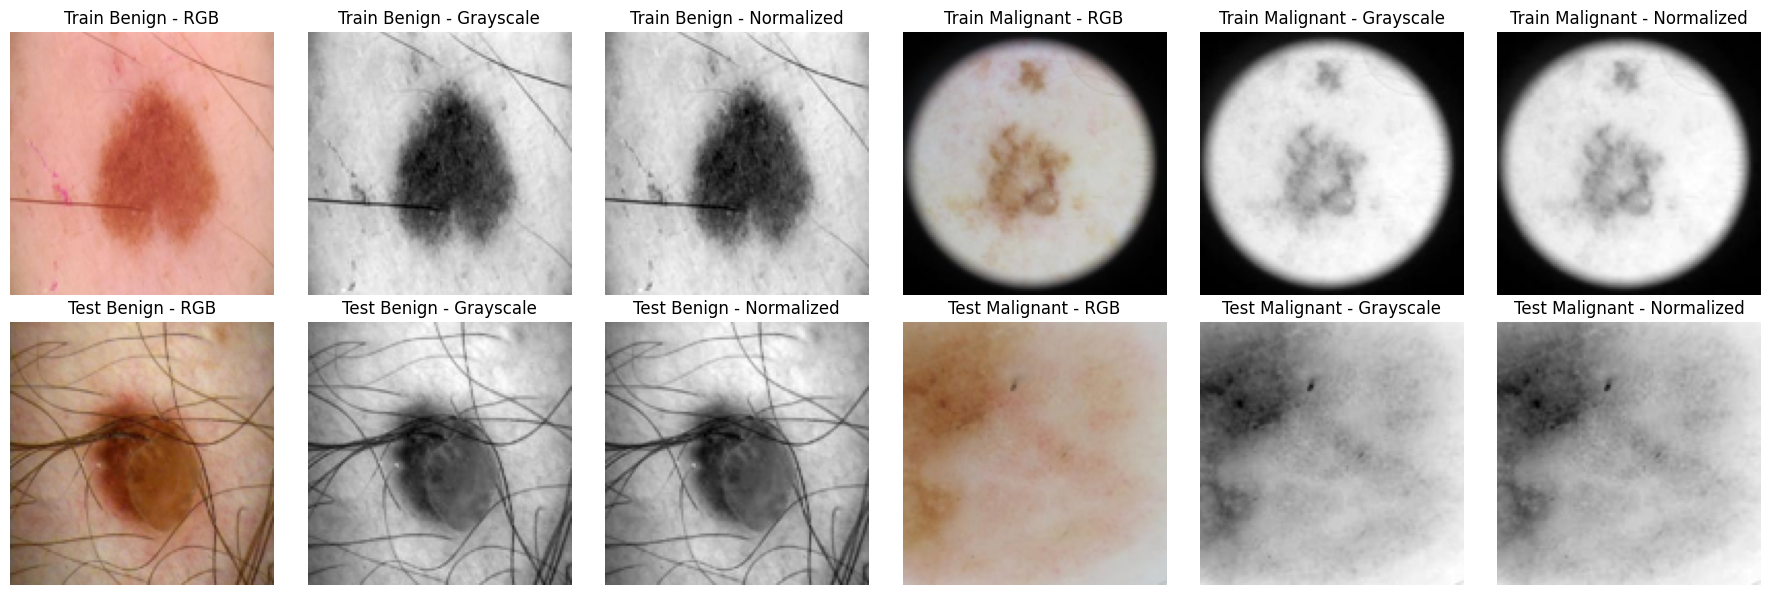

In [ ]:
def display_images():
    # Create a figure to display images with adjusted size
    fig, axes = plt.subplots(2, 6, figsize=(18, 6))  # 2 rows and 6 columns

    # Train images
    for i, class_name in enumerate(['benign', 'malignant']):
        # Select random images for training set
        rgb_train_img_path = os.path.join(rgb_train_folder, class_name, random.choice(os.listdir(os.path.join(rgb_train_folder, class_name))))
        gray_train_img_path = os.path.join(gray_train_folder, class_name, os.path.basename(rgb_train_img_path))
        normalized_train_img_path = os.path.join(normalized_train_folder, class_name, os.path.basename(rgb_train_img_path))

        # Load images
        rgb_train_img = Image.open(rgb_train_img_path).resize((128, 128))  # Resize images
        gray_train_img = Image.open(gray_train_img_path).resize((128, 128))
        normalized_train_img = Image.open(normalized_train_img_path).resize((128, 128))

        # Display images for Train
        axes[0, i*3].imshow(rgb_train_img)
        axes[0, i*3].set_title(f'Train {class_name.capitalize()} - RGB')
        axes[0, i*3].axis('off')

        axes[0, i*3+1].imshow(gray_train_img, cmap='gray')
        axes[0, i*3+1].set_title(f'Train {class_name.capitalize()} - Grayscale')
        axes[0, i*3+1].axis('off')

        axes[0, i*3+2].imshow(normalized_train_img, cmap='gray')
        axes[0, i*3+2].set_title(f'Train {class_name.capitalize()} - Normalized')
        axes[0, i*3+2].axis('off')

    # Test images
    for i, class_name in enumerate(['benign', 'malignant']):
        # Select random images for testing set
        rgb_test_img_path = os.path.join(rgb_test_folder, class_name, random.choice(os.listdir(os.path.join(rgb_test_folder, class_name))))
        gray_test_img_path = os.path.join(gray_test_folder, class_name, os.path.basename(rgb_test_img_path))
        normalized_test_img_path = os.path.join(normalized_test_folder, class_name, os.path.basename(rgb_test_img_path))

        # Load images
        rgb_test_img = Image.open(rgb_test_img_path).resize((128, 128))  # Resize images
        gray_test_img = Image.open(gray_test_img_path).resize((128, 128))
        normalized_test_img = Image.open(normalized_test_img_path).resize((128, 128))

        # Display images for Test
        axes[1, i*3].imshow(rgb_test_img)
        axes[1, i*3].set_title(f'Test {class_name.capitalize()} - RGB')
        axes[1, i*3].axis('off')

        axes[1, i*3+1].imshow(gray_test_img, cmap='gray')
        axes[1, i*3+1].set_title(f'Test {class_name.capitalize()} - Grayscale')
        axes[1, i*3+1].axis('off')

        axes[1, i*3+2].imshow(normalized_test_img, cmap='gray')
        axes[1, i*3+2].set_title(f'Test {class_name.capitalize()} - Normalized')
        axes[1, i*3+2].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display images
display_images()

#### Insights:
- The display_images function generates a grid of 12 images (2 rows and 6 columns) to showcase random samples from both the training and testing datasets for two classes: "benign" and "malignant." Each column represents a different image format: RGB, Grayscale, and Normalized. For each class and dataset, one image is selected from the respective folder (RGB, Grayscale, and Normalized) and resized to 128x128 pixels. The images are displayed without axes, and each is labeled with its respective class and format. The resulting figure allows a clear visual comparison of the three different formats (RGB, Grayscale, and Normalized) for both the training and testing data.

<h2><i>12. Augmentation process of the Train Images</i></h2>

<h3><i>Load the Dataset of Normalized Folder</i></h3>

In [ ]:
# Paths to grayscale images
normalized_train_benign = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/benign'
normalized_train_malignant = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/malignant'

# Output paths for augmented images
output_train_benign = '/content/drive/MyDrive/Datasets/augmented/train/benign/'
output_train_malignant = '/content/drive/MyDrive/Datasets/augmented/train/malignant/'

<h3><i>Ensuring there is No Duplicate Folder in that Name</i></h3>

In [ ]:
# Create output directories if they don't exist
os.makedirs(output_train_benign, exist_ok=True)
os.makedirs(output_train_malignant, exist_ok=True)

<h3><i>Augmentation Function</i></h3>

In [ ]:
# Define the five augmentations
augmentations = iaa.Sequential([
    iaa.Rotate(rotate=(-40, 40)),        # Rotate images by a random angle up to ±40 degrees
    iaa.Fliplr(0.5),                     # Horizontal flip
    iaa.Multiply((0.5, 1.5)),            # Randomly adjust the brightness of the images
    iaa.TranslateX(px=(-20, 20)),        # Shift images randomly along the x-axis by up to ±20 pixels
    iaa.Crop(percent=(0, 0.1)),          # Randomly crop the images, removing up to 10% from any side
])

<h3><i>Function to Augment Images</i></h3>

In [ ]:
# Function to augment images
def augment_images(input_folder, output_folder):
    total_images = len([f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png'))])
    print(f"Starting augmentation for {total_images} images")

    for i, filename in enumerate(os.listdir(input_folder)):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path)

            # Apply augmentations exactly 5 times for each image
            for j in range(1, 6):  # Create 5 augmented images per original
                augmented_image = augmentations(image=image)
                output_path = os.path.join(output_folder, f"{filename[:-4]}_aug_{j}.png")
                cv2.imwrite(output_path, augmented_image)

    print(f"Completed augmentation for {total_images} images in {input_folder}.")

<h3><i>Augmentation Process Initialization</i></h3>

In [ ]:
# Augment images for training and testing datasets
augment_images(normalized_train_benign, output_train_benign)
augment_images(normalized_train_malignant, output_train_malignant)
print("All augmentations completed!")

Starting augmentation for 4992 images
Completed augmentation for 4992 images in /content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/benign.
Starting augmentation for 4587 images
Completed augmentation for 4587 images in /content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/malignant.
All augmentations completed!


<h3><i>Total Count of Augmented Images</i></h3>

In [ ]:
def count_augmented_images(directory):
    # Count files with specific extensions in the directory
    count = len([f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])
    return count

# Count augmented images in each directory
benign_train_count = count_augmented_images(output_train_benign)
malignant_train_count = count_augmented_images(output_train_malignant)

# Calculate total count
total_count = (benign_train_count + malignant_train_count)

# Print the counts
print(f"Augmented images count in train benign: {benign_train_count}")
print(f"Augmented images count in train malignant: {malignant_train_count}")
print(f"Total augmented images count: {total_count}")

Augmented images count in train benign: 24960
Augmented images count in train malignant: 22935
Total augmented images count: 47895


<h3><i>Getting Number of Augmented Images for Per Image</i></h3>

In [ ]:
def count_augmentations_for_image(output_folder, original_filename):
    # Extract just the filename from the full path
    base_name = os.path.splitext(os.path.basename(original_filename))[0]

    # Count files in the output folder that match the pattern for augmentations of the given image
    count = len([f for f in os.listdir(output_folder) if f.startswith(base_name + "_aug_")])
    return count

# Usage example
output_train_benign = '/content/drive/MyDrive/Datasets/augmented/train/benign/'
original_image = '/content/drive/MyDrive/Datasets/augmented/train/benign/melanoma_0.jpg'  # Replace with the actual filename of the image

augment_count = count_augmentations_for_image(output_train_benign, original_image)
print(f"Number of augmented images created for '{original_image}': {augment_count}")

Number of augmented images created for '/content/drive/MyDrive/Datasets/augmented/train/benign/melanoma_0.jpg': 5


<h3><i>Function to Count Image Files in a Directory</i></h2>

In [ ]:
def count_images(directory):
    # Count files with specific extensions in the directory
    return len([f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])

<h3><i>Load the Dataset of Gray and Augmented - Train</i></h2>

In [ ]:
# Define the directories for original grayscale images and augmented images
gray_train_benign = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train/benign'
gray_train_malignant = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train/malignant'

# Output paths for augmented images
output_train_benign = '/content/drive/MyDrive/Datasets/augmented/train/benign/'
output_train_malignant = '/content/drive/MyDrive/Datasets/augmented/train/benign/'

<h3><i>Counting Grayscale and Augmented Images in Training Data</i></h2>

In [ ]:
# Count grayscale and augmented images
gray_image_count = (count_images(gray_train_benign) + count_images(gray_train_malignant))

augmented_image_count = (count_images(output_train_benign) + count_images(output_train_malignant))

<h3><i>Visualizing the Distribution of Grayscale and Augmented Images with Bar and Donut Charts</i></h2>

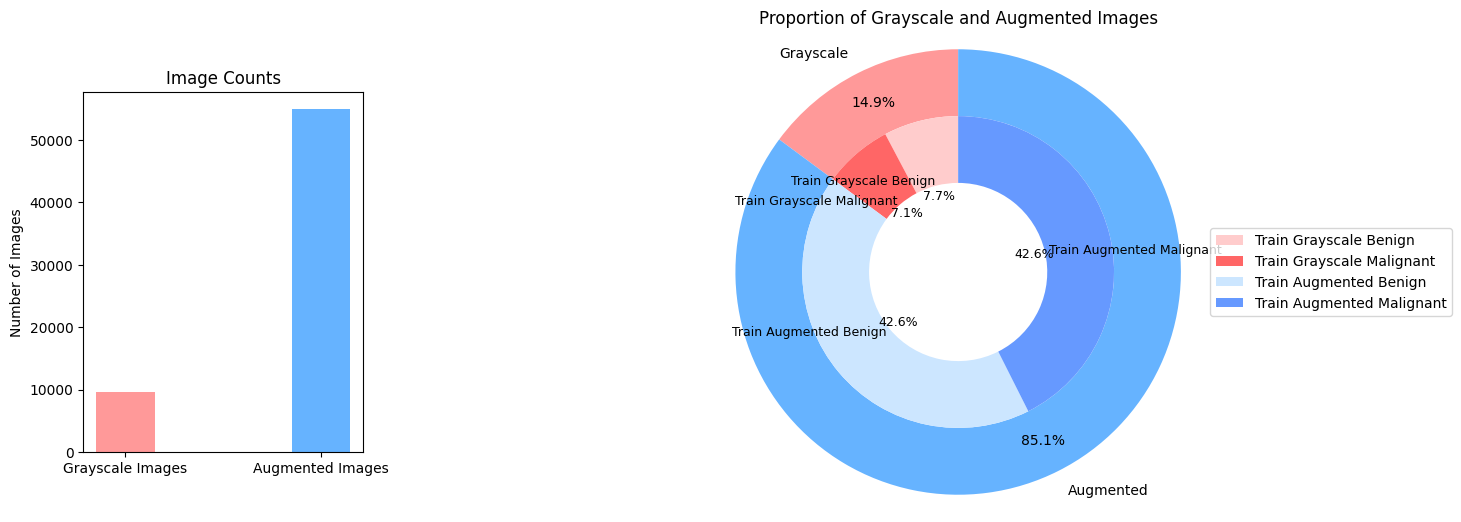

In [ ]:
# Sample data for simplicity
labels = ['Grayscale Images', 'Augmented Images']
counts = [gray_image_count, augmented_image_count]
colors = ['#ff9999', '#66b3ff']

# Define positions for the bars with reduced spacing
x_pos = np.arange(len(labels))

# Create a figure with two axes (subplots) and set specific sizes for each chart
fig = plt.figure(figsize=(14, 6))

# Bar chart (smaller dimensions)
ax1 = fig.add_axes([0.1, 0.2, 0.2, 0.6])  # Adjust position and size (left, bottom, width, height)
ax1.bar(x_pos, counts, color=colors, width=0.3)  # Set smaller width if needed
ax1.set_xticks(x_pos)  # Set x-tick positions
ax1.set_xticklabels(labels)  # Label the bars
ax1.set_title("Image Counts")
ax1.set_ylabel("Number of Images")

# Simplified donut chart (donut style with one outer and one inner ring)
ax2 = fig.add_axes([0.55, 0.1, 0.35, 0.8])  # Adjust as necessary for desired size and position

# Outer ring: Grayscale vs Augmented
outer_sizes = [gray_image_count, augmented_image_count]
outer_colors = ['#ff9999', '#66b3ff']
outer_labels = ['Grayscale', 'Augmented']

# Inner ring: Breakdown within Grayscale and Augmented
inner_sizes = [
    count_images(gray_train_benign), count_images(gray_train_malignant),
    count_images(output_train_benign), count_images(output_train_malignant)
]
inner_colors = ['#ffcccc', '#ff6666', '#cce6ff', '#6699ff']
inner_labels = [
    'Train Grayscale Benign', 'Train Grayscale Malignant',
    'Train Augmented Benign', 'Train Augmented Malignant'
]

# Draw outer ring (larger, donut-like)
ax2.pie(outer_sizes, radius=1, colors=outer_colors, labels=outer_labels,
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), pctdistance=0.85)

# Draw inner ring (smaller, donut-like for sub-categories)
wedges, texts, autotexts = ax2.pie(inner_sizes, radius=0.7, colors=inner_colors, labels=inner_labels,
                                   autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3),
                                   labeldistance=0.6, pctdistance=0.5)

# Set text size for better readability
for text in texts + autotexts:
    text.set_fontsize(9)

# Equal aspect ratio for circular pie charts
ax2.set_title("Proportion of Grayscale and Augmented Images")
ax2.axis('equal')

# Add a compact legend outside the chart
ax2.legend(wedges, inner_labels, loc="center left", bbox_to_anchor=(1, 0, 0.3, 1))

plt.show()

#### Insights:
- The code generates two visualizations to summarize the counts of grayscale and augmented images in the training dataset. The first is a bar chart, displaying the number of grayscale and augmented images with corresponding labels and colors, offering a clear comparison between the two categories. The second is a donut chart that shows the proportion of grayscale versus augmented images, with further breakdowns for each category, such as the subcategories of "Train Grayscale Benign," "Train Grayscale Malignant," "Train Augmented Benign," and "Train Augmented Malignant." The donut chart's outer ring represents the main categories (grayscale and augmented), while the inner ring provides a deeper dive into the distribution of images within each category. The charts are well-labeled, easy to read, and accompanied by a compact legend to provide clarity on the breakdown of the image data.

<h3><i>Image Resizing Function</i></h3>

In [ ]:
def resize_image(image, size=(200, 200)):
    return cv2.resize(image, size)

def resize_augmented_image(image, size=(125, 125)):
    return cv2.resize(image, size)

<h3><i>Displaying Original and Augmented Images</i></h3>

In [ ]:
def display_images(rgb_folder, gray_folder, normalized_folder, augmented_folder, image_filename, label):
    # Construct full paths for original images
    rgb_image_path = os.path.join(rgb_folder, image_filename)
    gray_image_path = os.path.join(gray_folder, image_filename)
    normalized_image_path = os.path.join(normalized_folder, image_filename)

    # Load original images
    rgb_image = cv2.imread(rgb_image_path)
    gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)
    normalized_image = cv2.imread(normalized_image_path)

    # Check image loading
    if rgb_image is None or gray_image is None or normalized_image is None:
        print("Error: One or more images could not be loaded.")
        return

    # Resize images to uniform size for display
    rgb_image = cv2.resize(rgb_image, (200, 200))
    gray_image = cv2.resize(gray_image, (200, 200))
    normalized_image = cv2.resize(normalized_image, (200, 200))

    # Load and resize augmented images (limit to 10)
    augmented_images = [cv2.resize(cv2.imread(os.path.join(augmented_folder, f)), (125, 125))
                        for f in os.listdir(augmented_folder)
                        if f.startswith(image_filename[:-4] + "_aug_")][:10]

    # Calculate the number of rows needed for augmented images
    rows_for_aug = (len(augmented_images) + 4) // 5  # Additional rows after originals

    # Define grid size dynamically
    total_rows = 1 + rows_for_aug  # 1 row for original images + rows for augmented images
    fig, axs = plt.subplots(total_rows, 5, figsize=(15, 3 * total_rows))
    fig.suptitle(f'{label}', fontsize=16, fontweight='bold')

    # Display the original images in the first row
    axs[0, 0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("RGB")
    axs[0, 1].imshow(gray_image, cmap='gray')
    axs[0, 1].set_title("Gray")
    axs[0, 2].imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))
    axs[0, 2].set_title("Normalized")

    # Turn off unused axes in the first row if there are any
    for i in range(3, 5):
        axs[0, i].axis("off")

    # Display augmented images in the next rows
    for idx, aug_img in enumerate(augmented_images):
        row, col = divmod(idx, 5)
        axs[row + 1, col].imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
        axs[row + 1, col].set_title(f"Aug Img {idx + 1}")

    # Turn off any remaining unused subplots in the last row
    remaining_slots = 5 - (len(augmented_images) % 5)
    if remaining_slots < 5:
        for col in range(5 - remaining_slots, 5):
            axs[total_rows - 1, col].axis("off")

    plt.tight_layout()
    plt.show()

<h3><i>Function to Pick Random Images</i></h3>

In [ ]:
def pick_random_image(folder):
    # Select a random image from the specified folder
    images = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
    return random.choice(images)

<h3><i>Load the path of Benign and Malignant of Train</i></h3>

In [ ]:
# Define your folder paths
train_benign_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/train/benign'
train_benign_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train/benign'
train_benign_normalized ='/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/benign'
train_benign_augmented = '/content/drive/MyDrive/Datasets/augmented/train/benign'
train_malignant_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/train/malignant'
train_malignant_gray = '/content/drive/MyDrive/Datasets/without_duplicates/gray/train/malignant'
train_malignant_normalized = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train/malignant'
train_malignant_augmented = '/content/drive/MyDrive/Datasets/augmented/train/malignant'

<h3><i>Displaying Randomly Selected Images from Training Folders</i></h3>

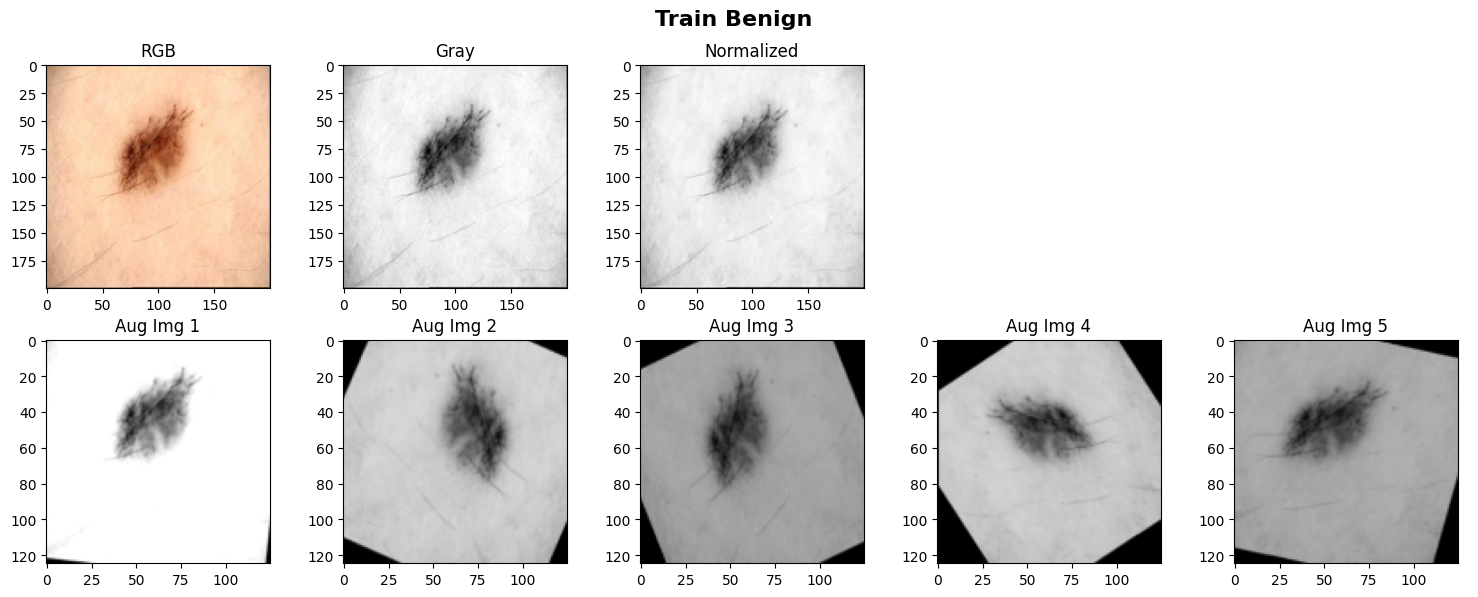

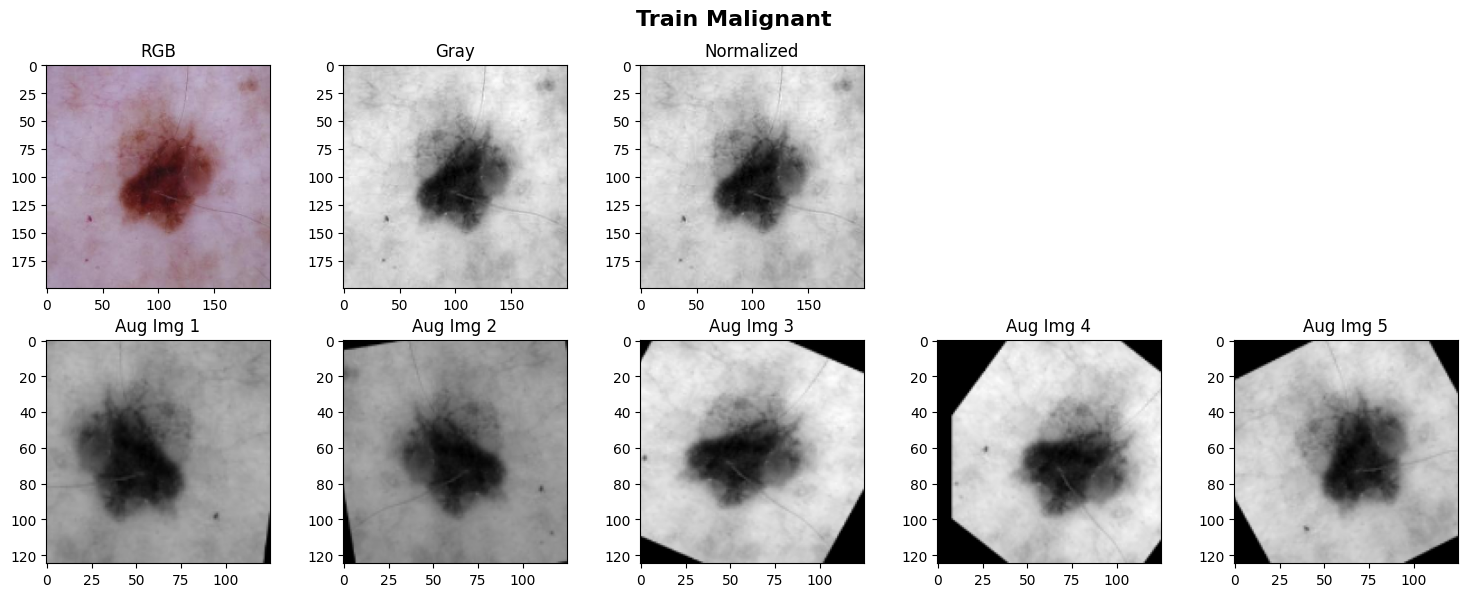

In [ ]:
# Randomly pick an image from each of the specified folders and display
for folder in [(train_benign_rgb, train_benign_gray, train_benign_normalized, train_benign_augmented, "Train Benign"),
               (train_malignant_rgb, train_malignant_gray, train_malignant_normalized, train_malignant_augmented, "Train Malignant")]:

    rgb_folder, gray_folder, normalized_folder, augmented_folder, label = folder  # Added label here
    image_filename = pick_random_image(rgb_folder)  # Randomly select an image from the RGB folder
    display_images(rgb_folder, gray_folder, normalized_folder, augmented_folder, image_filename, label)

#### Insights:
- The code randomly selects an image from the specified training folders (benign and malignant) and displays it along with its corresponding grayscale, normalized, and augmented versions. For each class (benign and malignant), it picks a random image from the RGB folder and loads the related grayscale, normalized, and augmented images from their respective folders. These images are then displayed in a grid layout, where the original images are shown in the first row, followed by the augmented images in subsequent rows. This visual comparison provides insight into how the images look in their original and augmented forms.

<h2><i>13. Augmentation process of the Test Images</i></h2>

In [ ]:
# Paths to grayscale images
normalized_test_benign = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test/benign'
normalized_test_malignant = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test/malignant'

# Output paths for augmented images
output_test_benign = '/content/drive/MyDrive/Datasets/augmented/test/benign/'
output_test_malignant = '/content/drive/MyDrive/Datasets/augmented/test/malignant/'

<h3><i>Ensure there is No Duplicate Folders</i></h3>

In [ ]:
# Create output directories if they don't exist
os.makedirs(output_test_benign, exist_ok=True)
os.makedirs(output_test_malignant, exist_ok=True)

<h3><i>Augmentation Function</i></h3>

In [ ]:
# Define the five augmentations
augmentations = iaa.Sequential([
    iaa.Rotate(rotate=(-40, 40)),        # Rotate images by a random angle up to ±40 degrees
    iaa.Fliplr(0.5),                     # Horizontal flip
    iaa.Multiply((0.5, 1.5)),            # Randomly adjust the brightness of the images
    iaa.TranslateX(px=(-20, 20)),        # Shift images randomly along the x-axis by up to ±20 pixels
    iaa.Crop(percent=(0, 0.1)),          # Randomly crop the images, removing up to 10% from any side
])

<h3><i>Function to create the Augmentation function</i></h3>

In [ ]:
def augment_images(input_folder, output_folder):
    # Get list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png'))]
    total_images = len(image_files)
    print(f"Starting augmentation for {total_images} images")
    # Loop through each image file
    for i, filename in enumerate(image_files, 1):  # Adding 1 for proper enumeration
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not read {image_path}. Skipping.")
            continue

        # Apply augmentations 5 times for each image
        for j in range(1, 6):  # Create 5 augmented images per original
            augmented_image = augmentations.augment_image(image)  # Apply augmentations
            output_path = os.path.join(output_folder, f"{filename[:-4]}_aug_{j}.png")
            cv2.imwrite(output_path, augmented_image)
    print(f"Completed augmentation for {total_images} images in {input_folder}.")

<h3><i>Augmenting Test Dataset Images for Benign and Malignant Classes</i></h3>

In [ ]:
# Augment images for training and testing datasets
augment_images(normalized_test_benign, output_test_benign)
augment_images(normalized_test_malignant, output_test_malignant)
print("All augmentations completed!")

Starting augmentation for 499 images
Completed augmentation for 499 images in /content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test/benign.
Starting augmentation for 500 images
Completed augmentation for 500 images in /content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test/malignant.
All augmentations completed!


<h3><i>Counting Augmented Images in Test Dataset for Benign and Malignant Classes</i></h3>

In [ ]:
def count_augmented_images(directory):
    # Count files with specific extensions in the directory
    count = len([f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])
    return count

# Count augmented images in each directory
benign_test_count = count_augmented_images(output_test_benign)
malignant_test_count = count_augmented_images(output_test_malignant)

# Calculate total count
total_count = (benign_test_count + malignant_test_count)

# Print the counts
print(f"Augmented images count in train benign: {benign_test_count}")
print(f"Augmented images count in train malignant: {malignant_test_count}")
print(f"Total augmented images count: {total_count}")

Augmented images count in train benign: 2495
Augmented images count in train malignant: 2500
Total augmented images count: 4995


<h2><i>14. CNN Model using Unique RGB Images</i></h2>

<h3><i>Load the Unique RGB images</i></h3>

In [ ]:
# Define paths for training and validation data
train_dir = '/content/drive/MyDrive/Datasets/without_duplicates/train'
test_dir = '/content/drive/MyDrive/Datasets/without_duplicates/test'

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 64, 64  # Resize images to a fixed size
batch_size = 16  # Number of images per batch

<h3><i>Defining the Spliting from Training Dataset</i></h3>

In [ ]:
# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% for validation
)

# Load training data (80% of data used for training)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Training data
)

# Load validation data (20% of data used for validation)
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Validation data
)

# Load test data (never used for training)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Don't shuffle, as you want to evaluate the final results
)

Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h3><i>Build the Model</i></h3>

In [ ]:
# Build the CNN model
model1 = models.Sequential([
    # Define the input shape using the Input layer
    layers.Input(shape=(img_height, img_width, 3)),

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3><i>Compile and Summarize the Model</i></h3>

In [ ]:
# Compile the model
model1.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

<h3><i>Providing Early Stopping</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3><i>Train the Model</i></h3>

In [ ]:
# Train the model
history = model1.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/10
479/479 [==============================] - 138s 285ms/step - loss: 0.4417 - accuracy: 0.7843 - precision: 0.8286 - recall: 0.6929 - auc: 0.8750 - val_loss: 0.3465 - val_accuracy: 0.8632 - val_precision: 0.9048 - val_recall: 0.7983 - val_auc: 0.9388
Epoch 2/10
479/479 [==============================] - 83s 174ms/step - loss: 0.3277 - accuracy: 0.8639 - precision: 0.8885 - recall: 0.8185 - auc: 0.9334 - val_loss: 0.3041 - val_accuracy: 0.8794 - val_precision: 0.8543 - val_recall: 0.9019 - val_auc: 0.9508
Epoch 3/10
479/479 [==============================] - 85s 177ms/step - loss: 0.2838 - accuracy: 0.8823 - precision: 0.8984 - recall: 0.8504 - auc: 0.9501 - val_loss: 0.2512 - val_accuracy: 0.8987 - val_precision: 0.9094 - val_recall: 0.8757 - val_auc: 0.9615
Epoch 4/10
479/479 [==============================] - 87s 181ms/step - loss: 0.2768 - accuracy: 0.8841 - precision: 0.8983 - recall: 0.8548 - auc: 0.9517 - val_loss: 0.2669 - val_accuracy: 0.8914 - val_precision: 0.9437 - 

<h3><i>Print the Evaluation Metrics</i></h3>

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model1.evaluate(test_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

63/63 [==============================] - 202s 3s/step - loss: 0.2277 - accuracy: 0.9069 - precision: 0.9339 - recall: 0.8760 - auc: 0.9696
Test Accuracy: 0.9069
Test Precision: 0.9339
Test Recall: 0.8760
Test AUC: 0.9696


<h3><i>Plot the Accuracy and Loss</i></h3>

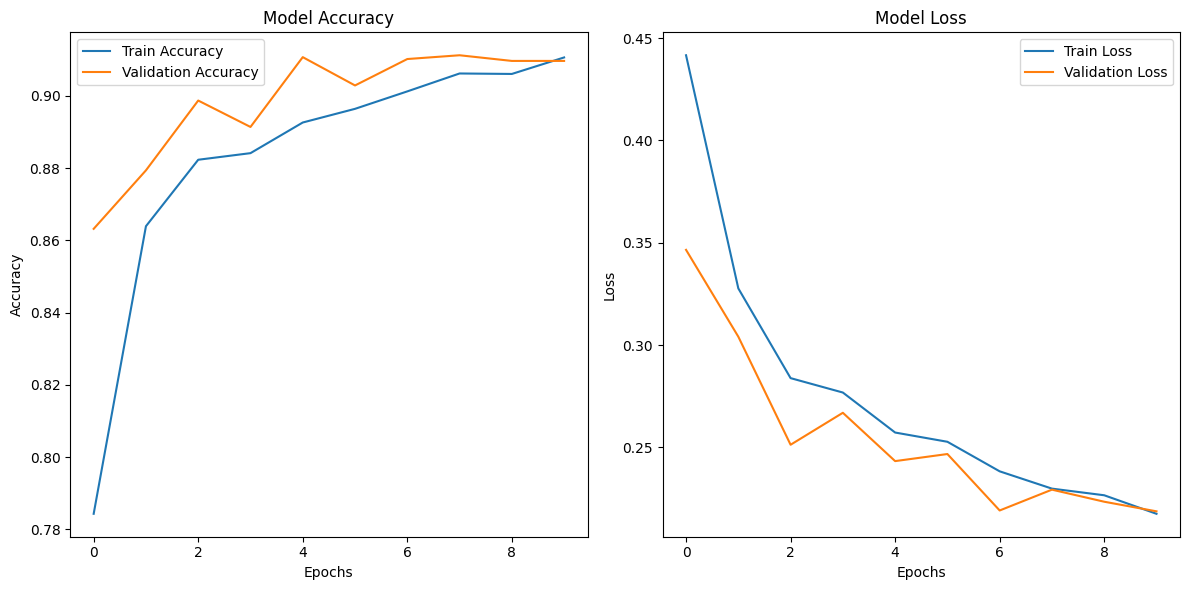

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Model Evaluation: Classification Report for Test Data</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model1.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

63/63 [==============================] - 3s 50ms/step
              precision    recall  f1-score     support
benign         0.883019  0.937876  0.909621  499.000000
malignant      0.933902  0.876000  0.904025  500.000000
accuracy       0.906907  0.906907  0.906907    0.906907
macro avg      0.908460  0.906938  0.906823  999.000000
weighted avg   0.908486  0.906907  0.906820  999.000000


<h3><i>Classification Report Heatmap</i></h3>

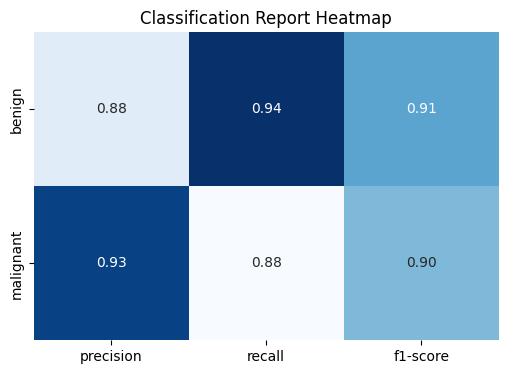

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The heatmap visualization of the classification report reveals the performance metrics for the binary classification task. The values displayed are precision, recall, and F1-score for each class (benign and malignant). For the benign class, precision is 0.88, recall is 0.94, and F1-score is 0.91, indicating a high level of accuracy in identifying benign samples. For the malignant class, precision is 0.93, recall is 0.88, and F1-score is 0.90, showing strong performance in detecting malignant cases as well. Overall, the model exhibits balanced and strong classification capabilities for both classes.

<h3><i>ROC Curve and AUC Calculation for Test Data</i></h3>

In [ ]:
# Get the true labels and predicted probabilities for the test set
y_true = test_data.classes  # True labels
y_pred_prob = model1.predict(test_data)  # Predicted probabilities

# For binary classification, y_pred_prob is a single column representing the probability of the positive class
# Since we have a sigmoid output, we use the probabilities directly
y_pred_prob = y_pred_prob.flatten()  # Flatten the output to 1D array

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

63/63 [==============================] - 3s 49ms/step


<h3><i>ROC Curve with AUC for Model Evaluation</i></h3>

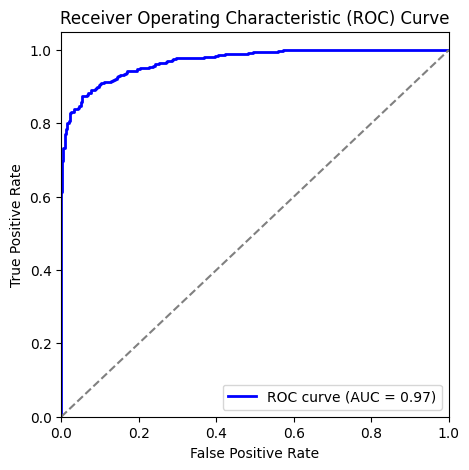

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Insights:
- The ROC curve plot illustrates the model's performance in distinguishing between the two classes (benign and malignant) across various threshold values. The curve, which represents the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity), shows that the model performs very well with an AUC (Area Under the Curve) of 0.97. This high AUC value indicates excellent discrimination ability, meaning the model is highly effective at distinguishing between benign and malignant cases with minimal false positives.

63/63 [==============================] - 3s 46ms/step


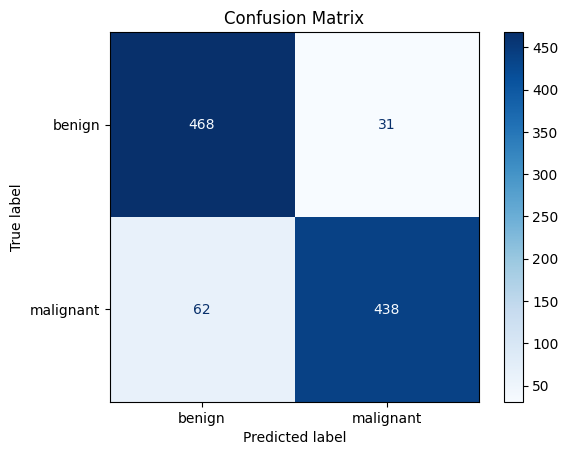

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model1.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix reveals that the model performs well in classifying the test data, with 468 true negatives (benign images correctly classified as benign) and 438 true positives (malignant images correctly classified as malignant). However, it also misclassified 31 benign images as malignant (false positives) and 62 malignant images as benign (false negatives). Despite these misclassifications, the model demonstrates strong overall performance, with a high number of correct classifications and relatively few errors, indicating a robust ability to distinguish between benign and malignant classes.

<h3><i>Save the Model</i></h3>

In [ ]:
# Save the model to your Google Drive
model1.save('/content/drive/MyDrive/Datasets/model1.keras')
print("Model saved Successfully")

Model saved Successfully


<h2 align = center><i>15. CNN Model using Gray Scaled Normalized Images</i></h2>

<h3><i>Load the Unique Gray Normalized images</i></h3>

In [ ]:
# Define paths for training and validation data
train_dir = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/train'
test_dir = '/content/drive/MyDrive/Datasets/without_duplicates/gray/normalized/test'

<h3><i>Define the Parameters</i></h3>

In [ ]:
# Parameters
img_height, img_width = 64, 64  # Resize images to a fixed size
batch_size = 16  # Number of images per batch

<h3><i>Code for validation splitting</i></h3>

In [ ]:
# Define ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Reserve 20% for validation
)

# Load training data (80% of data used for training)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Training data
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)

# Load validation data (20% of data used for validation)
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Validation data
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)

# Load test data (never used for training)
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,  # Don't shuffle, as you want to evaluate the final results
    color_mode='grayscale'  # Ensure images are loaded as grayscale (1 channel)
)


Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


<h3><i>Build the Model</i></h3>

In [ ]:
# Build the CNN model
model2 = models.Sequential([
    # Input layer (for grayscale images with 1 channel)
    layers.Input(shape=(img_height, img_width, 1)),  # 1 channel for grayscale images

    # Convolutional layers + MaxPooling layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification (benign vs malignant)
])

<h3><i>Compile and Summarize Model</i></h3>

In [ ]:
# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate here
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,073 (1.35 MB)

 Trainable params: 355,073 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

<h3><i>Providing the Early Stoping for Monitoring the Improvement</i></h3>

In [ ]:
# Early stopping callback to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement in validation loss
    restore_best_weights=True
)

<h3><i>Train the Model</i></h3>

In [ ]:
# Train the model
history = model2.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    callbacks=[early_stopping]
)

Epoch 1/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 151s 310ms/step - AUC: 0.7329 - Precision: 0.7000 - Recall: 0.5600 - accuracy: 0.6728 - loss: 0.5892 - val_AUC: 0.8962 - val_Precision: 0.8548 - val_Recall: 0.7383 - val_accuracy: 0.8146 - val_loss: 0.4215
Epoch 2/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 83s 174ms/step - AUC: 0.9121 - Precision: 0.8483 - Recall: 0.8004 - accuracy: 0.8345 - loss: 0.3770 - val_AUC: 0.9190 - val_Precision: 0.8687 - val_Recall: 0.7503 - val_accuracy: 0.8261 - val_loss: 0.3755
Epoch 3/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - AUC: 0.9295 - Precision: 0.8709 - Recall: 0.8280 - accuracy: 0.8565 - loss: 0.3363 - val_AUC: 0.9341 - val_Precision: 0.8818 - val_Recall: 0.7808 - val_accuracy: 0.8449 - val_loss: 0.3421
Epoch 4/10
479/479 ━━━━━━━━━━━━━━━━━━━━ 83s 172ms/step - AUC: 0.9422 - Precision: 0.8866 - Recall: 0.8448 - accuracy: 0.8740 - loss: 0.3060 - val_AUC: 0.9484 - val_Precision: 0.8215 - val_Recall: 0.9182 - val_accuracy: 0.8653 - val_loss: 0.3159
Epoch 5/10
479/479 

<h3><i>Evaluating Model Performance on Test Data</i></h3>

In [ ]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_auc = model2.evaluate(val_data)

# Output the test metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - AUC: 0.9693 - Precision: 0.9263 - Recall: 0.8894 - accuracy: 0.9125 - loss: 0.2307
Test Accuracy: 0.9097
Test Precision: 0.9306
Test Recall: 0.8768
Test AUC: 0.9689


<h3><i>Visualizing Model Performance: Accuracy and Loss</i></h3>

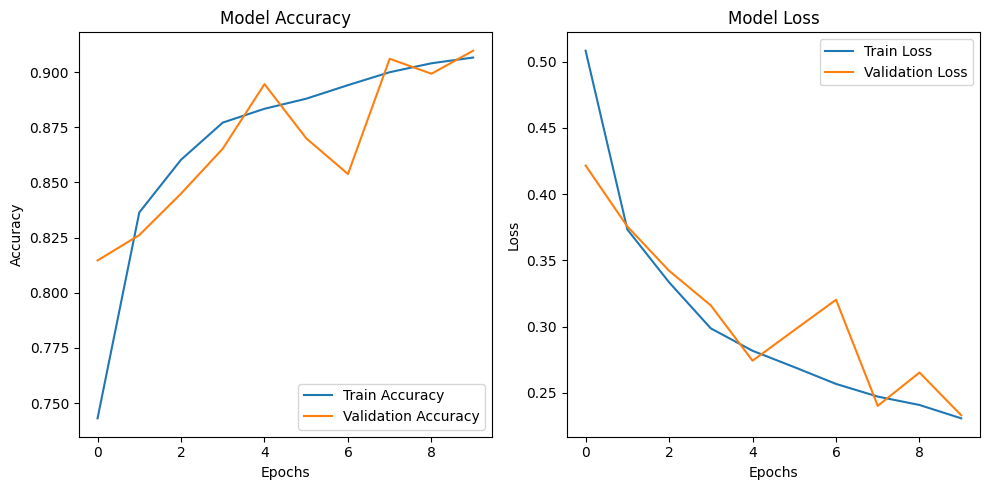

In [ ]:
# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### Insights:
- The output of the code generates two subplots, displayed side by side. The first subplot shows the model accuracy over the epochs, comparing both the training and validation accuracy. You can observe how the model's accuracy improves over time for both the training and validation datasets. The second subplot shows the model loss over the epochs, comparing both training and validation loss, which ideally decreases over time as the model improves. The plots are labeled with titles, axis labels, and legends for clarity, and the layout is adjusted for better spacing between the subplots.

<h3><i>Generating and Displaying Classification Report</i></h3>

In [ ]:
# Get the true labels and predictions from the test data
y_true = test_data.classes  # True labels
y_pred = model2.predict(test_data)
y_pred = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Convert the classification report to a pandas DataFrame for better readability
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), output_dict=True)).transpose()

# Display the report in tabular format
print(report_df)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
              precision    recall  f1-score     support
benign         0.899408  0.913828  0.906561  499.000000
malignant      0.912602  0.898000  0.905242  500.000000
accuracy       0.905906  0.905906  0.905906    0.905906
macro avg      0.906005  0.905914  0.905901  999.000000
weighted avg   0.906012  0.905906  0.905901  999.000000


<h3><i>Visualizing Classification Report as Heatmap</i></h3>

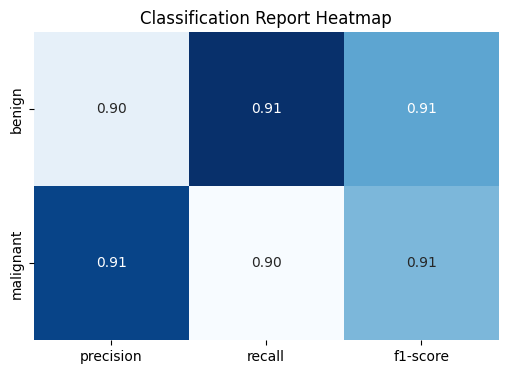

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-3, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", cbar=False)

plt.title('Classification Report Heatmap')
plt.show()

#### Insights:
- The classification report heatmap visualizes the performance of the model across various metrics such as Precision, Recall, and F1-score. The values displayed represent the model's metrics for different classes, indicating the model's strong performance in classification tasks. These metrics are crucial for assessing the balance between precision and recall, where values closer to 1 indicate better performance. The heatmap helps to visually interpret these metrics, making it easier to understand how well the model is distinguishing between classes.

<h3><i>Visualizing Confusion Matrix</i></h3>

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


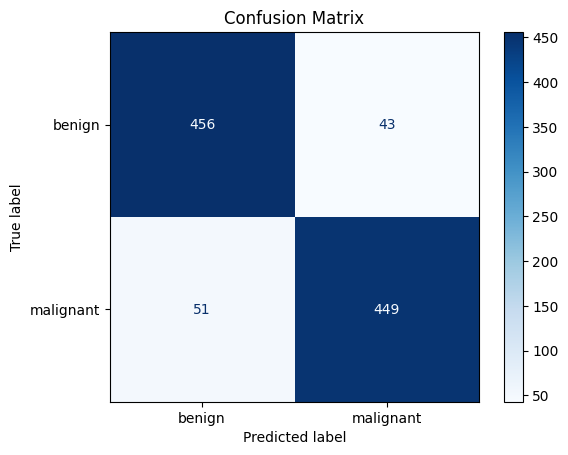

In [ ]:
# Get true labels and predicted labels
y_true = test_data.classes  # True labels
y_pred = (model2.predict(test_data) > 0.5).astype(int).flatten()  # Predicted labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

#### Insights:
- The confusion matrix displayed represents the model's performance in classifying the test data into two categories: benign and malignant. The values "456" and "43" are the true positives and false negatives, respectively, while "51" and "449" are the false positives and true negatives. This indicates that the model correctly identified 456 benign samples as benign and 449 malignant samples as malignant, but misclassified 43 benign samples as malignant and 51 malignant samples as benign. The confusion matrix provides valuable insight into the model's classification accuracy, highlighting areas where improvements can be made, such as reducing false positives and false negatives.

<h3><i>Function for ROC Curve</i></h3>

In [ ]:
# Predict probabilities on the test data
y_pred_prob = model2.predict(test_data)  # Predicted probabilities

# Extract true labels from the test data
y_true = test_data.classes  # Ground truth labels

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Compute AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


<h3><i>ROC Curve for Model Evaluation</i></h3>

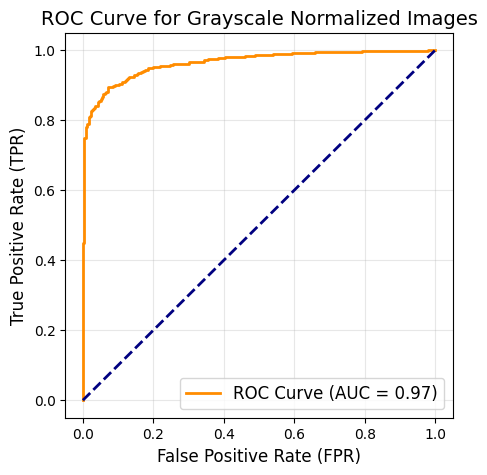

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve for Grayscale Normalized Images', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

#### Insights:
- The ROC curve displayed shows the performance of the model in distinguishing between benign and malignant classes, with the Area Under the Curve (AUC) value of 0.97, indicating excellent model performance. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR), and the closer the curve is to the top-left corner, the better the model. The dashed diagonal line represents a random classifier, and the ROC curve for this model significantly outperforms it. The high AUC value suggests that the model is highly effective at classifying both classes with a low rate of false positives.

<h2><i>Save the Model</i></h2>

In [ ]:
# Save the model to your Google Drive
model2.save('/content/drive/MyDrive/Datasets/model2.keras')
print("Model saved successfully!")

Model saved successfully!


<h2><i>14. Augmentation for the RGB Imaged</i></h3>

In [ ]:
# Paths to rgb images
train_benign_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/train/benign'
train_malignant_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/train/malignant'

# Output paths for augmented images
output_train_benign_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign'
output_train_malignant_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/malignant'

In [ ]:
  # Create output directories if they don't exist
os.makedirs(output_train_benign_rgb, exist_ok=True)
os.makedirs(output_train_malignant_rgb, exist_ok=True)

In [ ]:
# Define the five augmentations
augmentations = iaa.Sequential([
    iaa.Rotate(rotate=(-40, 40)),        # Rotate images by a random angle up to ±40 degrees
    iaa.Fliplr(0.5),                     # Horizontal flip
    iaa.Multiply((0.5, 1.5)),            # Randomly adjust the brightness of the images
    iaa.TranslateX(px=(-20, 20)),        # Shift images randomly along the x-axis by up to ±20 pixels
    iaa.Crop(percent=(0, 0.1)),          # Randomly crop the images, removing up to 10% from any side
])

In [ ]:
def augment_images(input_folder, output_folder):
    # Get list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png'))]
    total_images = len(image_files)
    print(f"Starting augmentation for {total_images} images")
    # Loop through each image file
    for i, filename in enumerate(image_files, 1):  # Adding 1 for proper enumeration
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Could not read {image_path}. Skipping.")
            continue

        # Apply augmentations 5 times for each image
        for j in range(1, 6):  # Create 5 augmented images per original
            augmented_image = augmentations.augment_image(image)  # Apply augmentations
            output_path = os.path.join(output_folder, f"{filename[:-4]}_aug_{j}.png")
            cv2.imwrite(output_path, augmented_image)
    print(f"Completed augmentation for {total_images} images in {input_folder}.")

In [ ]:
# Augment images for training benign dataset
augment_images(train_benign_rgb, output_train_benign_rgb)

# Augment images for training malignant dataset
augment_images(train_malignant_rgb, output_train_malignant_rgb)

# Print completion message
print("All augmentations for training datasets are completed successfully!")

Starting augmentation for 4992 images
Completed augmentation for 4992 images in /content/drive/MyDrive/Datasets/without_duplicates/train/benign.
Starting augmentation for 4587 images
Completed augmentation for 4587 images in /content/drive/MyDrive/Datasets/without_duplicates/train/malignant.
All augmentations for training datasets are completed successfully!


In [ ]:
def count_augmented_images(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return 0  # Return 0 if directory doesn't exist
    # Count files with specific extensions in the directory
    count = len([f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))])
    return count

# Define directory paths
output_train_benign_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign'
output_train_malignant_rgb = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/malignant'

# Count augmented images in each directory
benign_train_count = count_augmented_images(output_train_benign_rgb)
malignant_train_count = count_augmented_images(output_train_malignant_rgb)

# Calculate total count
total_count = benign_train_count + malignant_train_count

# Print the counts
print(f"Augmented images count in train benign: {benign_train_count}")
print(f"Augmented images count in train malignant: {malignant_train_count}")
print(f"Total augmented images count: {total_count}")

Augmented images count in train benign: 24960
Augmented images count in train malignant: 22935
Total augmented images count: 47895


In [ ]:
def count_augmentations_for_image(output_folder, original_filename):
    # Extract just the filename from the full path
    base_name = os.path.splitext(os.path.basename(original_filename))[0]

    # Count files in the output folder that match the pattern for augmentations of the given image
    count = len([f for f in os.listdir(output_folder) if f.startswith(base_name + "_aug_")])
    return count

# Usage example
output_train_benign = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign'
original_image = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign/melanoma_0.png'  # Replace with the actual filename of the image

augment_count = count_augmentations_for_image(output_train_benign, original_image)
print(f"Number of augmented images created for '{original_image}': {augment_count}")

Number of augmented images created for '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign/melanoma_0.png': 5


In [ ]:
# Function to load a random image from a directory
def load_random_image(directory):
    image_files = os.listdir(directory)
    # Filter only image files (you can add other formats if needed)
    image_files = [f for f in image_files if f.endswith('.png') or f.endswith('.jpg')]
    return random.choice(image_files)

# Function to get augmented images for a given original image
def get_augmented_images(output_folder, original_filename):
    base_name = os.path.splitext(os.path.basename(original_filename))[0]
    # List all the augmented files
    augmented_files = [f for f in os.listdir(output_folder) if f.startswith(base_name + "_aug_") and (f.endswith('.png') or f.endswith('.jpg'))]
    return augmented_files

In [ ]:
# Function to display the images
def display_images(original_image, augmented_images, original_directory, augmented_directory, row_idx):
    # Create a plot with 1 row for original and augmented images
    num_images = len(augmented_images) + 1  # Including the original image
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # 1 row, num_images columns

    # Display the original image (first column)
    original_img = mpimg.imread(os.path.join(original_directory, original_image))
    axes[0].imshow(original_img)
    axes[0].axis('off')
    axes[0].set_title(f"Original RGB Image - {original_image.split('_')[0]}")

    # Display augmented images (remaining columns)
    for i, aug_image in enumerate(augmented_images):
        aug_img = mpimg.imread(os.path.join(augmented_directory, aug_image))
        axes[i+1].imshow(aug_img)
        axes[i+1].axis('off')
        axes[i+1].set_title(f"Aug {i+1}")

    plt.tight_layout()
    plt.show()

In [ ]:
# Paths
benign_directory = '/content/drive/MyDrive/Datasets/without_duplicates/train/benign'
malignant_directory = '/content/drive/MyDrive/Datasets/without_duplicates/train/malignant'
output_benign_folder = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/benign'  # Augmented output for benign
output_malignant_folder = '/content/drive/MyDrive/Datasets/without_duplicates/augmented_rgb/train/malignant'  # Augmented output for malignant

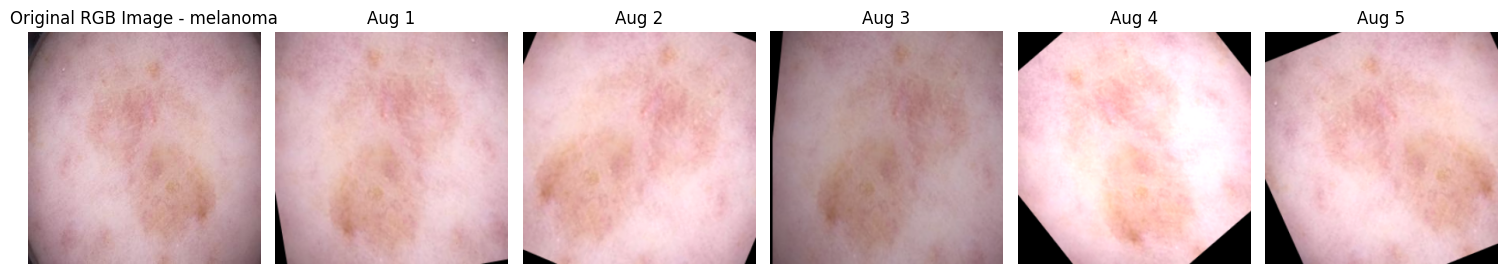

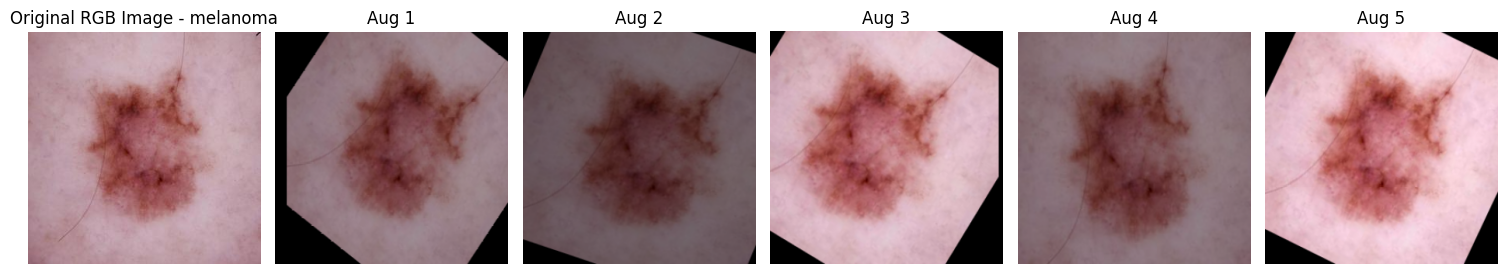

In [ ]:
# Load random images and their augmentations for benign and malignant
random_benign_image = load_random_image(benign_directory)
random_malignant_image = load_random_image(malignant_directory)

augmented_benign_images = get_augmented_images(output_benign_folder, random_benign_image)
augmented_malignant_images = get_augmented_images(output_malignant_folder, random_malignant_image)

# Display the images for benign and malignant categories
# First row: benign images
display_images(random_benign_image, augmented_benign_images[:5], benign_directory, output_benign_folder, row_idx=1)

# Second row: malignant images
display_images(random_malignant_image, augmented_malignant_images[:5], malignant_directory, output_malignant_folder, row_idx=2)

### NOTE:
- Due to the limitations of GPU resources, the model training process will be continued in the next notebook to ensure efficient execution and optimal performance.